# Part I - Dataset PISA2012
## by Peter Szilvasi

# Table of content
1. [Introduction](#introduction)
2. [Preliminary Wrangling](#preliminary-wrangling)
3. [Univariate Exploration](#univariate-exploration)
4. [Bivariate Exploration](#bivariate-exploration)
5. [Multivariate Exploration](#multivariate-exploration)
6. [Conclusions](#conclusions)

## Introduction

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

* [PISA Data](https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip) contains students' assessments informations.
* [PISA Data Dictionary](https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv) explains the variables in the data set.
* The data and topics of investigation come from the [PISA Data Visualization Competition](http://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm).

> Note: The unzipped PISA Data csv file is 2.75 GB.

## Preliminary Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../datasets/pisa2012.csv', encoding='latin1', low_memory=False)
columns = pd.read_csv('../datasets/pisadict2012.csv', encoding='latin1')

In [ ]:
print('Shape of the dataset: ', df.shape)
print('Shape of the columns dictionary: ', columns.shape)

In [ ]:
df.info()

### What is the structure of your dataset?

The dataset contains 485K rows and 635 columns. It means that there are 7.1K entries per country on average. The type of the datasets are 57.95% alphanumeric and 42.15% numeric.

### What is/are the main feature(s) of interest in your dataset?

Features of interests:
* Country development: under-developed, developing, developed
* School background: at school, ICT, class size, ...
* Family background: wealth, possesion, siblings, parental education, divorce, ...
* Students phenotype: gender, age, region, immigrant, ... 
* Outside school: hobbies, friends, freetime, studytime, ...
* Scores: math, reading, comptetions, ...

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

#### Selected features
CNT, IC10Q08, IC10Q09, ICTSCH, ST71Q01, FAMSTRUC, ST11Q03, ST11Q04, ST13Q01, ST17Q01, HISEI, PARED, ST27Q01, ST27Q02, ST27Q03, ST27Q05, ST28Q01, ST04Q01, AGE, IMMIG, LMINS, MMINS, SMINS, ST55Q01, ST55Q02, ST55Q03, ST55Q04, ST57Q01, IC08Q01, IC08Q02, IC08Q05, IC08Q06, TIMEINT, PV1MATH, PV1READ, PV1SCIE

#### Features description

|Country columns|Country descriptions|School columns|School descriptions|Family columns|Family descriptions|Students columns|Students descriptions|Out-of-school columns|Out-of-school descriptions|Scores columns|Scores descriptions|
|---|---|---|---|---|---|---|---|---|---|---|---|
| CNT | Country code 3-character | IC10Q08 |  At School - Homework | FAMSTRUC |  Family Structure | ST04Q01 | Gender | ST55Q01 |  Out of school lessons - test lang | PV1MATH |  Plausible value 1 in mathematics |
|  |  | IC10Q09 |  At School - Group work | ST11Q03 |  At Home - Brothers | AGE | Age of student | ST55Q02 |  Out of school lessons - maths | PV1READ |  Plausible value 1 in reading |
|  |  | ICTSCH |  ICT Availability at School | ST11Q04 |  At Home - Sisters | IMMIG | Immigration status | ST55Q03 |  Out of school lessons - science | PV1SCIE |  Plausible value 1 in science |
|  |  | ST71Q01 |  No of ALL class period a week | ST13Q01 |  Mother Highest Schooling | LMINS | Learning time (minutes per week)  - test language | ST55Q04 |  Out of school lessons - other |  |  |
|  |  |  |  | ST17Q01 |  Father Highest Schooling | MMINS | Learning time (minutes per week)- Mathematics | ST57Q01 |  Out-of-School Study Time - Homework |  |  |
|  |  |  |  | HISEI |  Highest parental occupational status | SMINS | Learning time (minutes per week) - Science | IC08Q01 |  Out-of-school 8 - One player games. |  |  |
|  |  |  |  | PARED |  Highest parental education in years |  |  | IC08Q02 |  Out-of-school 8 - ColLabourative games. |  |  |
|  |  |  |  | ST27Q01 |  How many - cellular phones |  |  | IC08Q05 |  Out-of-school 8 - Social networks |  |  |
|  |  |  |  | ST27Q02 |  How many - televisions |  |  | IC08Q06 |  Out-of-school 8 - Browse the Internet for fun |  |  |
|  |  |  |  | ST27Q03 |  How many - computers |  |  | TIMEINT |  Time of computer use (mins) |  |  |
|  |  |  |  | ST27Q05 |  How many - rooms bath or shower |  |  |  |  |  |  |
|  |  |  |  | ST28Q01 |  How many books at home |  |  |  |  |  |  |

### Data Wrangling

In [ ]:
# Select three country based on GDP/capita (lower, middle, higher) and homeland
df1 = df[(df.CNT == 'Albania') | (df.CNT == 'Portugal') | (df.CNT == 'Germany') | (df.CNT == 'Hungary')]
df1.CNT.value_counts()

In [ ]:
# Select the features of interest
df2 = df1[['CNT', 'IC10Q08', 'IC10Q09', 'ICTSCH', 'ST71Q01', 'FAMSTRUC', 'ST11Q03', 'ST11Q04', 'ST13Q01', 'ST17Q01', 'HISEI', 'PARED', 'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q05', 'ST28Q01', 'ST04Q01', 'AGE', 'IMMIG', 'LMINS', 'MMINS', 'SMINS', 'ST55Q01', 'ST55Q02', 'ST55Q03', 'ST55Q04', 'ST57Q01', 'IC08Q01', 'IC08Q02', 'IC08Q05', 'IC08Q06', 'TIMEINT', 'PV1MATH', 'PV1READ', 'PV1SCIE']]
df2 = df2.rename({
    'CNT': 'country', 'IC10Q08': 'school_homework', 'IC10Q09': 'school_groupwork', 'ICTSCH': 'school_ict', 'ST71Q01': 'school_classes_per_week', 'FAMSTRUC': 'parent_numbers', 'ST11Q03': 'brothers', 'ST11Q04': 'sisters', 'ST13Q01': 'mother_schooling', 'ST17Q01': 'father_schooling', 'HISEI': 'parent_occupational', 'PARED': 'parent_education_years', 'ST27Q01': 'home_phones',
    'ST27Q02': 'home_televisions', 'ST27Q03': 'home_computers', 'ST27Q05': 'home_rooms', 'ST28Q01': 'home_books', 'ST04Q01': 'gender', 'AGE': 'age', 'IMMIG': 'immigrant', 'LMINS': 'language_minutes_per_week', 'MMINS': 'math_minutes_per_week', 'SMINS': 'science_minutes_per_week', 'ST55Q01': 'outofschool_language', 'ST55Q02': 'outofschool_math',
    'ST55Q03': 'outofschool_science', 'ST55Q04': 'outofschool_others', 'ST57Q01': 'outofschool_homework_hours', 'IC08Q01': 'outofschool_single_games', 'IC08Q02': 'outofschool_multi_games', 'IC08Q05': 'outofschool_social_networks', 'IC08Q06': 'outofschool_internet', 'TIMEINT': 'computer_use_minutes', 'PV1MATH': 'math_score', 'PV1READ': 'read_score', 'PV1SCIE': 'science_score'}, axis='columns')

df2

In [ ]:
df2.to_csv('../datasets/pisa2012_subset.csv')

In [2]:
df2 = pd.read_csv('../datasets/pisa2012_subset.csv', index_col=0)
df2_cleaned = df2.copy()
df2_cleaned.columns

Index(['country', 'school_homework', 'school_groupwork', 'school_ict',
       'school_classes_per_week', 'parent_numbers', 'brothers', 'sisters',
       'mother_schooling', 'father_schooling', 'parent_occupational',
       'parent_education_years', 'home_phones', 'home_televisions',
       'home_computers', 'home_rooms', 'home_books', 'gender', 'age',
       'immigrant', 'language_minutes_per_week', 'math_minutes_per_week',
       'science_minutes_per_week', 'outofschool_language', 'outofschool_math',
       'outofschool_science', 'outofschool_others',
       'outofschool_homework_hours', 'outofschool_single_games',
       'outofschool_multi_games', 'outofschool_social_networks',
       'outofschool_internet', 'computer_use_minutes', 'math_score',
       'read_score', 'science_score'],
      dtype='object')

In [3]:
def cast_to_category(df, columns, category, renamed_category=None):
    if renamed_category is None:
        return df[columns].astype(category)

    for column in columns:
        df[column] = df[column].astype(category).cat.rename_categories(renamed_category)

    return df[columns]

#### Define
Cast the 'Every day', 'Almost every day', 'Once or twice a week', 'Once or twice a month', 'Never or hardly ever' values into categorical type.

In [4]:
frequency_columns = ['school_homework', 'school_groupwork', 'outofschool_single_games', 'outofschool_multi_games', 'outofschool_social_networks', 'outofschool_internet']
frequency_category = pd.CategoricalDtype(categories=['Never or hardly ever', 'Once or twice a month', 'Once or twice a week', 'Almost every day', 'Every day'], ordered=True)

df2_cleaned[frequency_columns] = cast_to_category(df2_cleaned, frequency_columns, frequency_category)

In [5]:
assert pd.api.types.is_categorical_dtype(df2_cleaned.school_homework)
assert pd.api.types.is_categorical_dtype(df2_cleaned.school_groupwork)
assert pd.api.types.is_categorical_dtype(df2_cleaned.outofschool_single_games)
assert pd.api.types.is_categorical_dtype(df2_cleaned.outofschool_multi_games)
assert pd.api.types.is_categorical_dtype(df2_cleaned.outofschool_social_networks)
assert pd.api.types.is_categorical_dtype(df2_cleaned.outofschool_internet)

#### Define
Cast the out of school activites values into categorical type

In [6]:
weekly_hours_columns = ['outofschool_language', 'outofschool_math', 'outofschool_science', 'outofschool_others']
weekly_hours_category = pd.CategoricalDtype(categories=['I do not attend <out-of-school time lessons> in this subject', 'Less than 2 hours a week', '2 or more but less than 4 hours a week', '4 or more but less than 6 hours a week', '6 or more hours a week'], ordered=True)
renamed_weekly_hours = ['0 hours a week', '0-2 hours a week', '2-4 hours a week', '4-6 hours a week', '6+ week']

df2_cleaned[weekly_hours_columns] = cast_to_category(df2_cleaned, weekly_hours_columns, weekly_hours_category, renamed_weekly_hours)

In [7]:
assert pd.api.types.is_categorical_dtype(df2_cleaned.outofschool_language)
assert pd.api.types.is_categorical_dtype(df2_cleaned.outofschool_math)
assert pd.api.types.is_categorical_dtype(df2_cleaned.outofschool_science)
assert pd.api.types.is_categorical_dtype(df2_cleaned.outofschool_others)

#### Define
Cast the home accessories values into categorical type

In [8]:
amount_columns = ['home_phones', 'home_televisions', 'home_computers', 'home_rooms']
amount_category = pd.CategoricalDtype(categories=['None', 'One', 'Two', 'Three or more'], ordered=True)
book_category = pd.CategoricalDtype(categories=['0-10 books ', '11-25 books ', '26-100 books ', '101-200 books ', '201-500 books ', 'More than 500 books'], ordered=True)

df2_cleaned[amount_columns] = cast_to_category(df2_cleaned, amount_columns, amount_category)
df2_cleaned.home_books = df2_cleaned.home_books.astype(book_category)

In [9]:
assert pd.api.types.is_categorical_dtype(df2_cleaned.home_phones)
assert pd.api.types.is_categorical_dtype(df2_cleaned.home_televisions)
assert pd.api.types.is_categorical_dtype(df2_cleaned.home_computers)
assert pd.api.types.is_categorical_dtype(df2_cleaned.home_rooms)
assert pd.api.types.is_categorical_dtype(df2_cleaned.home_books)

#### Define 
Cast the immigrant values into categorical type

In [10]:
immigrant_category = pd.CategoricalDtype(categories=['Native', 'Second-Generation', 'First-Generation'], ordered=True)
df2_cleaned.immigrant = df2_cleaned.immigrant.astype(immigrant_category)

In [11]:
assert pd.api.types.is_categorical_dtype(df2_cleaned.immigrant)

#### Define
Cast binary columns `brothers`, `sisters`.

In [12]:
binary = {'Yes': 1, 'No': 0}

df2_cleaned.brothers = df2_cleaned.brothers.map(binary)
df2_cleaned.sisters = df2_cleaned.sisters.map(binary)

In [13]:
assert pd.api.types.is_numeric_dtype(df2_cleaned.brothers)
assert pd.api.types.is_numeric_dtype(df2_cleaned.sisters)

#### Define
Cast parents' [levels of education](https://ec.europa.eu/eurostat/documents/1978984/6037342/ISCED-EN.pdf) columns `mother_schooling`, and `father_schooling` into categorical type.

In [14]:
schooling_columns = ['mother_schooling', 'father_schooling']
schooling_category = pd.CategoricalDtype(categories=['She did not complete <ISCED level 1> ', '<ISCED level 1> ', '<ISCED level 2> ', '<ISCED level 3B, 3C> ', '<ISCED level 3A> '], ordered=True)
renamed_schooling = ['Pre-Primary', 'Primary', 'Lower Secondary', 'Secondary', 'High school']

df2_cleaned[schooling_columns] = cast_to_category(df2_cleaned, schooling_columns, schooling_category, renamed_schooling)

In [15]:
assert pd.api.types.is_categorical_dtype(df2_cleaned.mother_schooling)
assert pd.api.types.is_categorical_dtype(df2_cleaned.father_schooling)

#### Define
Map the family structure values 3 to 0. Because the 3 family structure means that there are no mother and father at home. The 2 means that there are two parents. The 1 means that there is one parent.

In [16]:
df2_cleaned.parent_numbers = df2_cleaned.parent_numbers.map({1:1, 2:2, 3:0})

In [17]:
assert pd.api.types.is_numeric_dtype(df2_cleaned.parent_numbers)

In [18]:
df2_cleaned.to_csv('../datasets/pisa2012_subset_cleaned.csv')
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20276 entries, 0 to 389250
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   country                      20276 non-null  object  
 1   school_homework              14092 non-null  category
 2   school_groupwork             14094 non-null  category
 3   school_ict                   14337 non-null  float64 
 4   school_classes_per_week      10743 non-null  float64 
 5   parent_numbers               17626 non-null  float64 
 6   brothers                     15969 non-null  float64 
 7   sisters                      15617 non-null  float64 
 8   mother_schooling             18331 non-null  category
 9   father_schooling             16788 non-null  category
 10  parent_occupational          13973 non-null  float64 
 11  parent_education_years       18943 non-null  float64 
 12  home_phones                  18934 non-null  category
 13  

> Note: I do not plan to drop the NaN values, because I will lose a significant (~80%) amount of the data.

## Univariate Exploration

In [19]:
df = pd.read_csv('../datasets/pisa2012_subset_cleaned.csv', index_col=0)
df.columns

Index(['country', 'school_homework', 'school_groupwork', 'school_ict',
       'school_classes_per_week', 'parent_numbers', 'brothers', 'sisters',
       'mother_schooling', 'father_schooling', 'parent_occupational',
       'parent_education_years', 'home_phones', 'home_televisions',
       'home_computers', 'home_rooms', 'home_books', 'gender', 'age',
       'immigrant', 'language_minutes_per_week', 'math_minutes_per_week',
       'science_minutes_per_week', 'outofschool_language', 'outofschool_math',
       'outofschool_science', 'outofschool_others',
       'outofschool_homework_hours', 'outofschool_single_games',
       'outofschool_multi_games', 'outofschool_social_networks',
       'outofschool_internet', 'computer_use_minutes', 'math_score',
       'read_score', 'science_score'],
      dtype='object')

### How many students participated in the survey for each country?

Portugal    5722
Germany     5001
Hungary     4810
Albania     4743
Name: country, dtype: int64


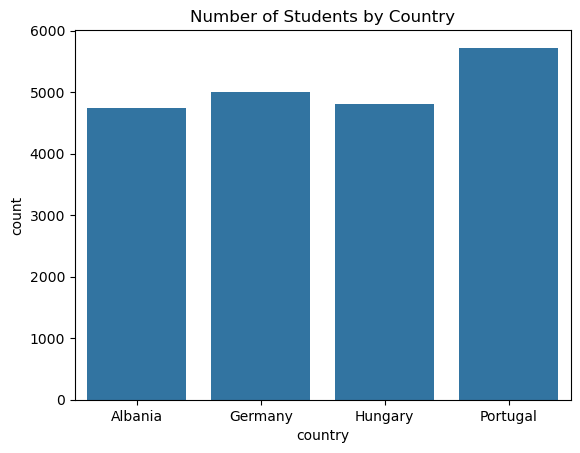

In [20]:
print(df.country.value_counts())
sns.countplot(data=df, x='country', color=sns.color_palette()[0])
plt.title('Number of Students by Country');

Portugal contains the most student who participated in the survey. Followed by Germany, Hungary, and Albania.

### What is the group work ratio across the students?

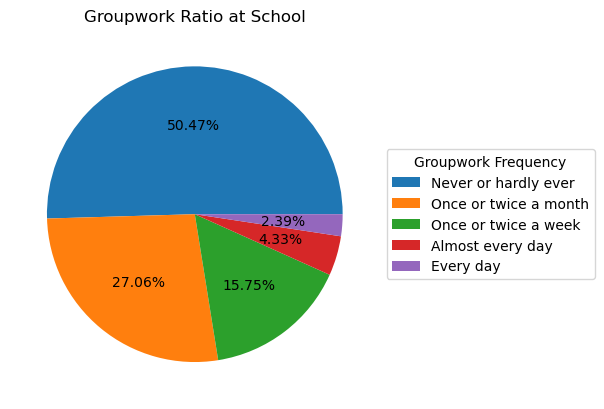

In [21]:
data = df.school_groupwork.value_counts() / df.school_groupwork.value_counts().sum()
labels = df.school_groupwork.value_counts().keys()

wedges, texts, autotexts = plt.pie(data, autopct='%1.2f%%')
plt.legend(wedges, labels, title="Groupwork Frequency", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Groupwork Ratio at School');

More than half of the students do not have group work at school. Students sometimes have a couple of group work every month. The minority of the students have group work a couple of times a week.

### What is the distribution of the number of classes per week?

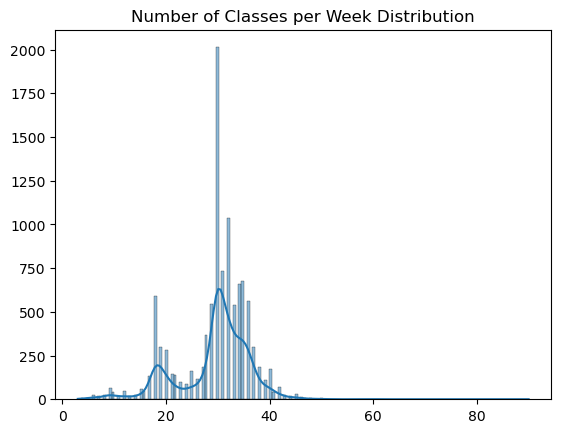

In [22]:
sns.histplot(data=df, x="school_classes_per_week", kde=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Classes per Week Distribution');

The number of classes per week distribution is bimodal. There are two normal distribution curves. One of the peaks is around 18 hours, the other peak is around 30 hours per week.

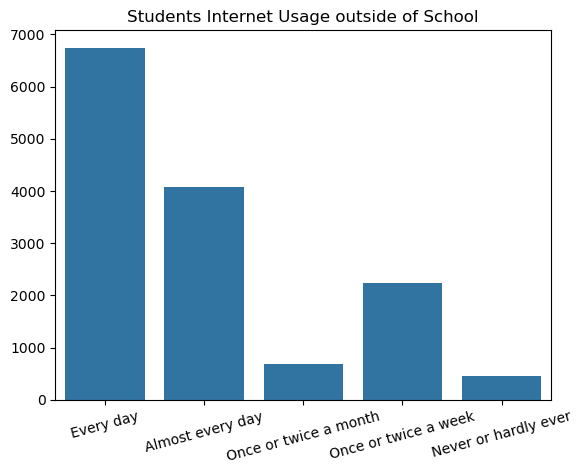

In [23]:
sns.countplot(data=df, x='outofschool_internet', color=sns.color_palette()[0])
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('')
plt.title('Students Internet Usage outside of School');

The majority of the students use the internet every day or almost every day outside of school.

### What is the distribution of homework and computer usage?

In [24]:
# Convert the computer usage from minutes per day to hours per week
df.computer_use_minutes = (df.computer_use_minutes / 60.0) * 7.0
df.rename(columns={'computer_use_minutes': 'computer_use_hours'}, inplace=True)

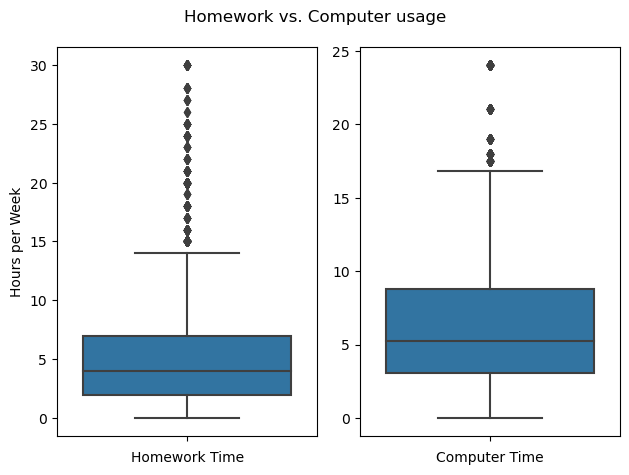

In [25]:
fig, axes = plt.subplots(1, 2)
ax1 = sns.boxplot(data=df, y='outofschool_homework_hours', ax=axes[0])
ax2 = sns.boxplot(data=df, y='computer_use_hours', ax=axes[1])
ax1.set_ylabel('Hours per Week')
ax1.set_xlabel('Homework Time')
ax2.set_ylabel('')
ax2.set_xlabel('Computer Time')
fig.suptitle('Homework vs. Computer usage')
fig.tight_layout();

Most of the students do homework for 4-5 hours a week. On the other side, they use the computer 6-7 hours a week.\
Several students do homework for more than 12 hours per week. Conversely, fewer students use the computer for more than 17 hours per week. Generally, computer usage time is more spread out than homework time.

### What is the distribution of time spent across the different subjects (language, math, science)?

In [26]:
# Convert minutes to hours
df[['language_minutes_per_week', 'math_minutes_per_week', 'science_minutes_per_week']] = df[['language_minutes_per_week', 'math_minutes_per_week', 'science_minutes_per_week']] / 60.0
df.rename(columns={'language_minutes_per_week': 'language_hours_per_week', 'math_minutes_per_week': 'math_hours_per_week', 'science_minutes_per_week': 'science_hours_per_week'}, inplace=True)

In [63]:
def clean_subplot_labels(axes, title, xlabels, ylabels, titlesize=20, labelsize=16, xlim=None, rotation=0):
    for ax, xlabel, ylabel in zip(axes, xlabels, ylabels):
        ax.set_xlabel(xlabel, fontsize=labelsize, rotation=rotation)
        ax.set_xlim(xlim)
        ax.set_ylabel(ylabel, fontsize=labelsize)
        ax.set_title(title, fontsize=titlesize)
        
    return axes

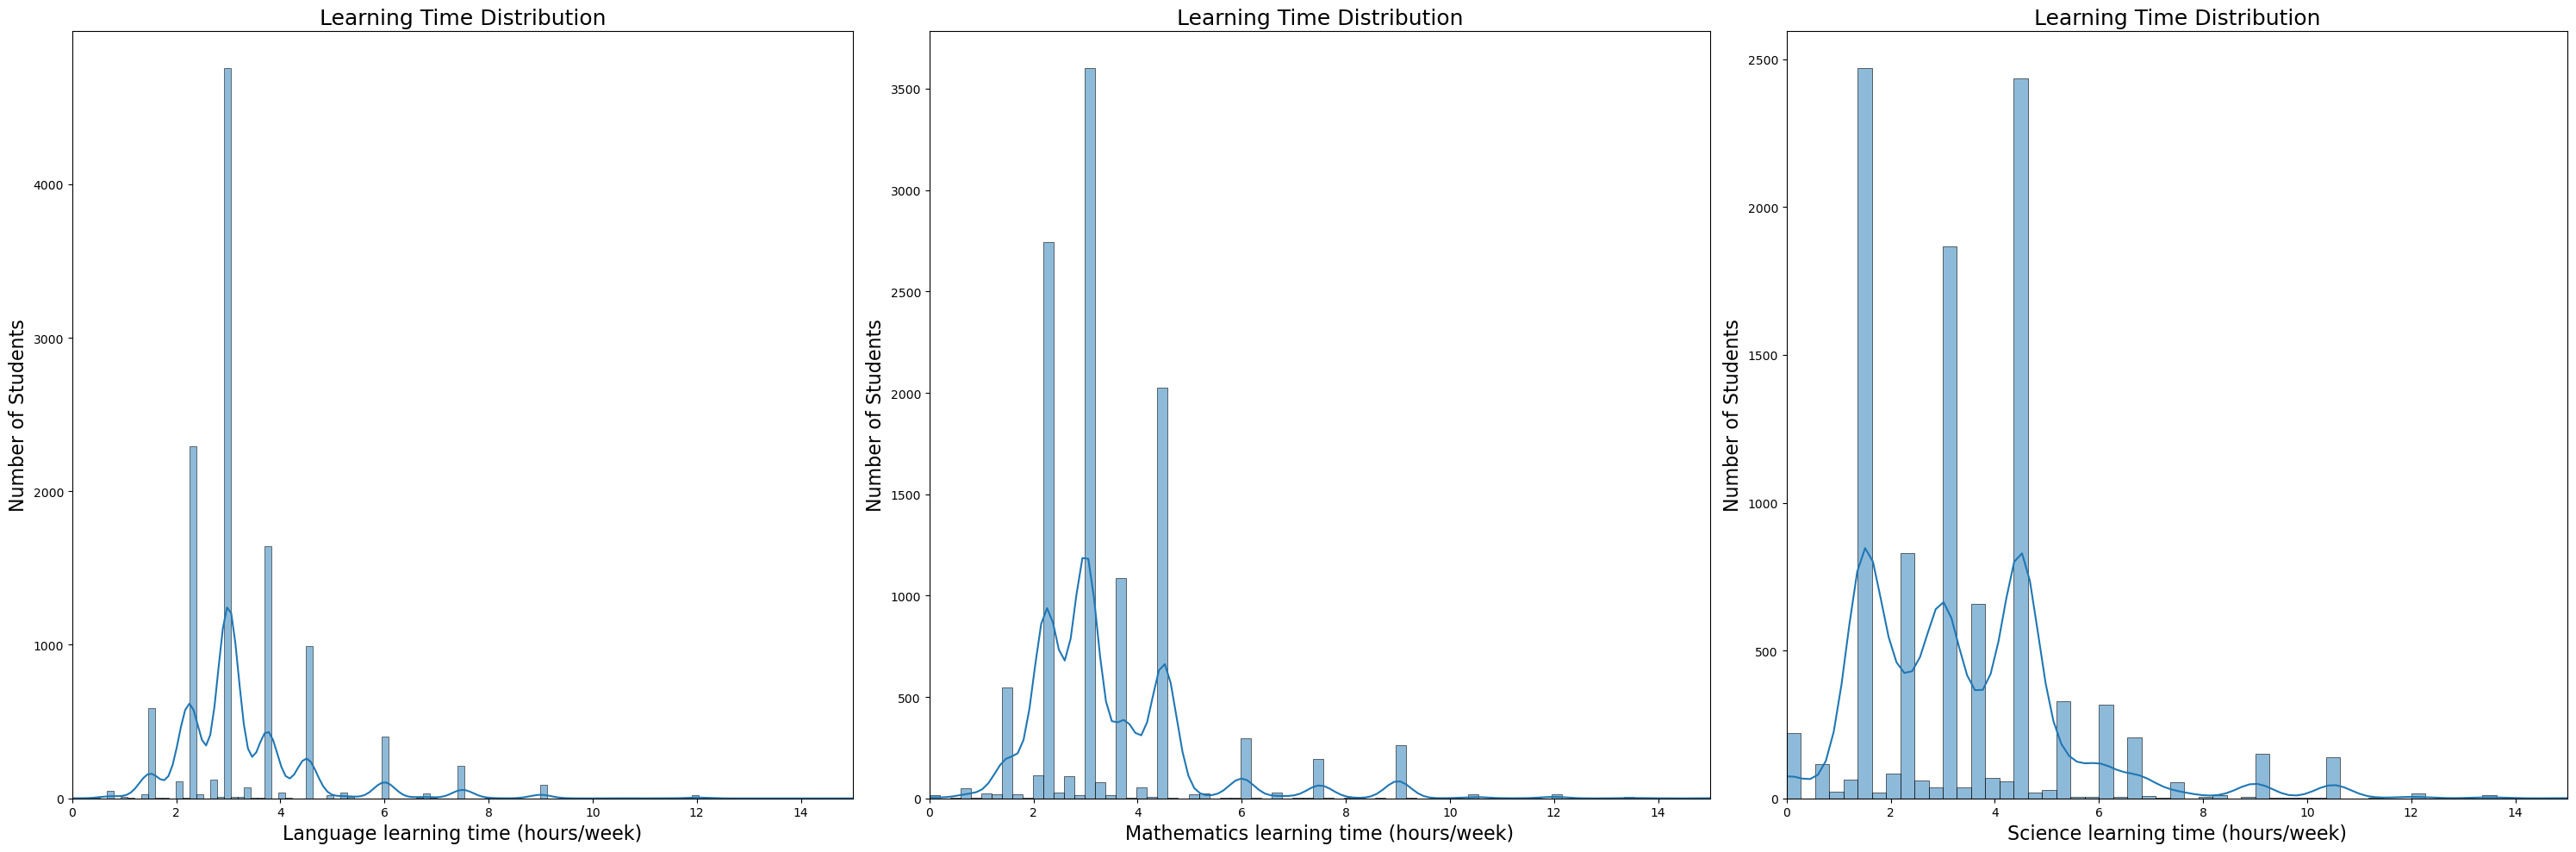

In [64]:
class_xlabels = ['Language learning time (hours/week)', 'Mathematics learning time (hours/week)', 'Science learning time (hours/week)']
class_ylabels = ['Number of Students', 'Number of Students', 'Number of Students']
title = 'Learning Time Distribution'

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(30, 10)
sns.histplot(data=df, x="language_hours_per_week", kde=True, ax=axes[0])
sns.histplot(data=df, x="math_hours_per_week", kde=True, ax=axes[1])
sns.histplot(data=df, x="science_hours_per_week", kde=True, ax=axes[2])

# Limit the vertical axis because of the outliers
clean_subplot_labels(axes, title, class_xlabels, class_ylabels, xlim=[0, 15])

fig.tight_layout();

Time spent on language classes weekly is normally distributed. The average is around 3 hours per week. Science classes contain the most outlier which is understandable because every student has to choose a faculty at some point. Science distribution has 3 peaks at around 1.8, 3.0, and 4.2 hours per week. Before choosing faculty students to have the same number of science classes then it will increase or decrease according to the chosen faculty. Mathematics distribution also has several peaks. The average hours per week is close to 3. 

### How much do students rely on teachers outside of school?

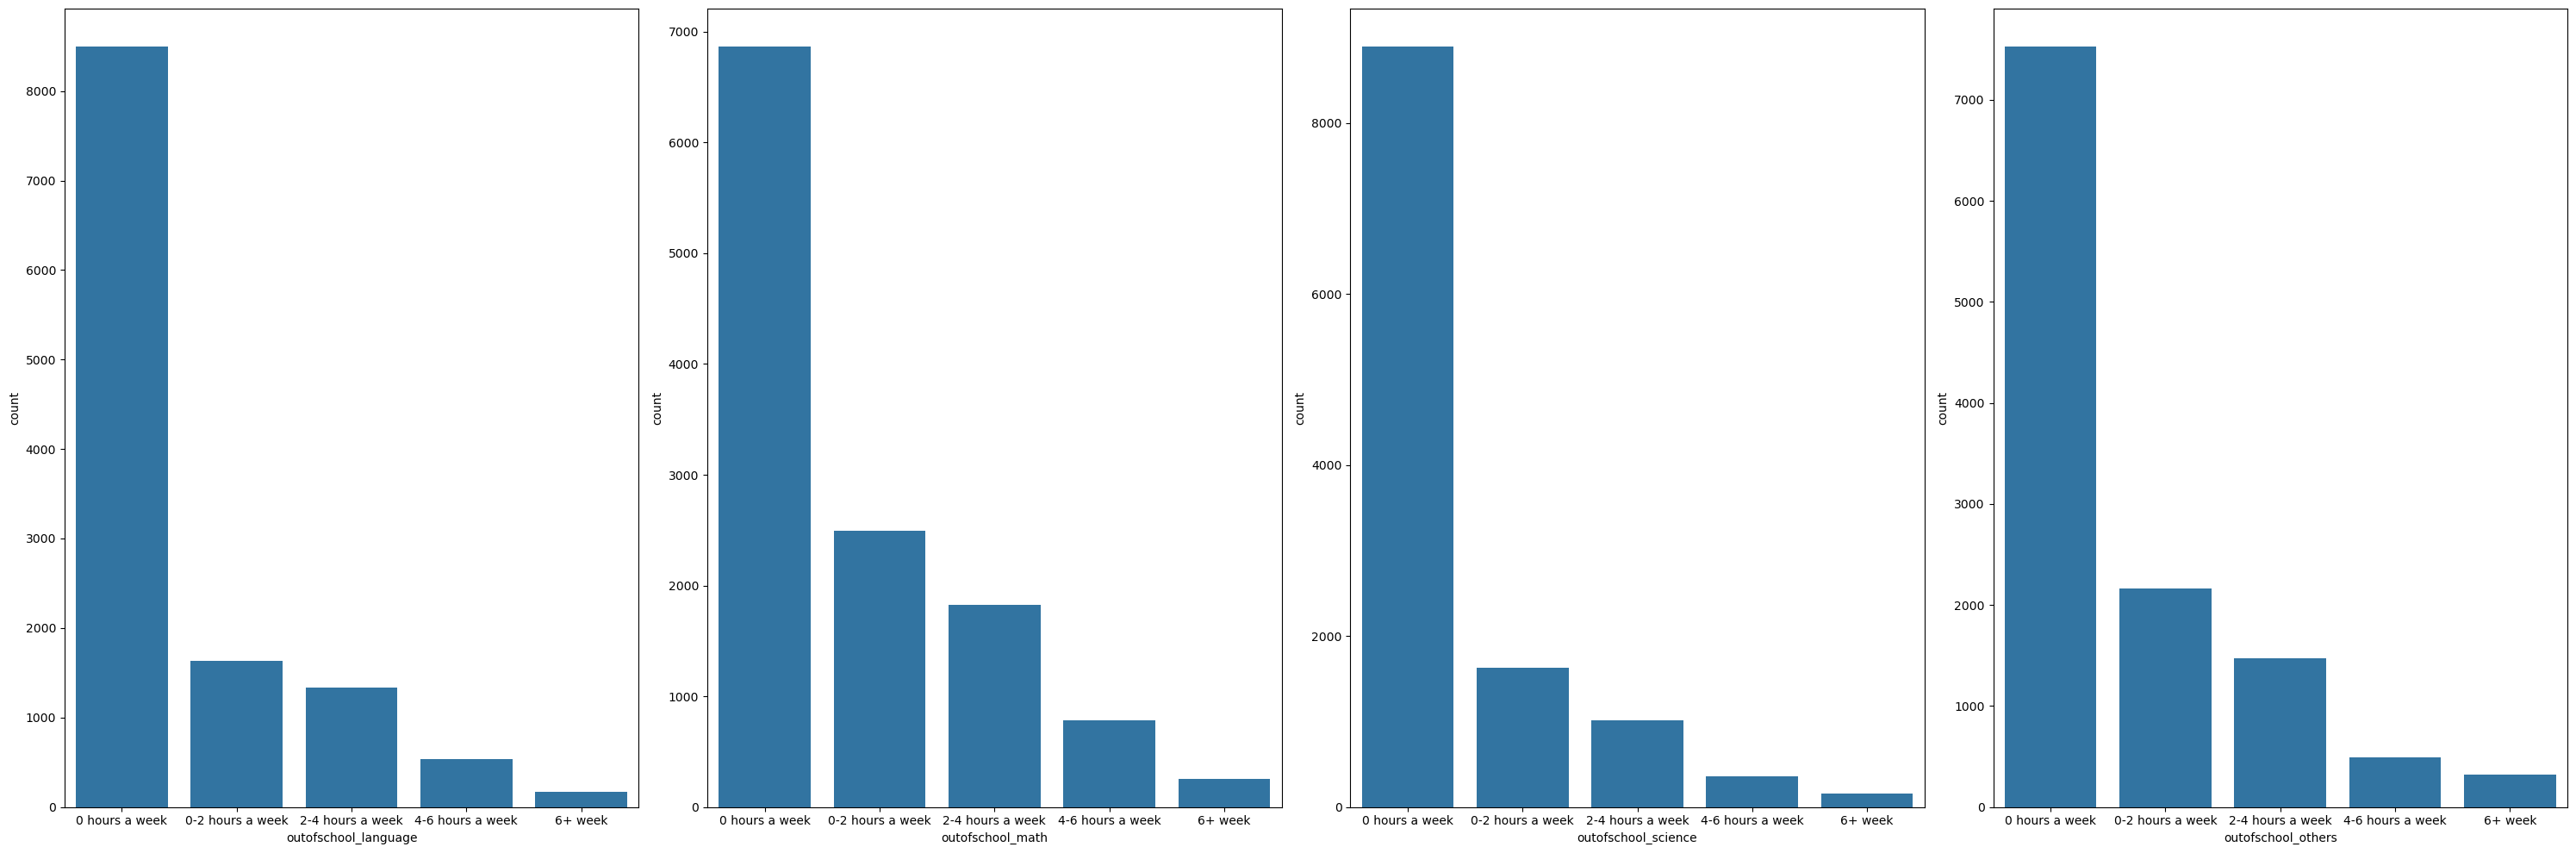

In [67]:
outofschool_xlables = ['Language', 'Mathematics', 'Science', 'Others']
outofschool_ylabels = '' * len(outofschool_xlables)
title = 'Students Teaching outside of School'

fig, axes = plt.subplots(1, 4)
fig.set_size_inches(30, 10)
sns.countplot(data=df, x='outofschool_language', color=sns.color_palette()[0], order=renamed_weekly_hours, ax=axes[0])
sns.countplot(data=df, x='outofschool_math', color=sns.color_palette()[0], order=renamed_weekly_hours, ax=axes[1])
sns.countplot(data=df, x='outofschool_science', color=sns.color_palette()[0], order=renamed_weekly_hours, ax=axes[2])
sns.countplot(data=df, x='outofschool_others', color=sns.color_palette()[0], order=renamed_weekly_hours, ax=axes[3])

clean_subplot_labels(axes, title, outofschool_xlables, outofschool_ylabels)

fig.tight_layout();

Students make rarely use of teaching outside of school. The majority of students do not spend time learning outside of school across the subjects. By comparing the subjects, we can see that students take lessons in mathematics and others subject more likely than in science or language.

> Note: I decided to convert the expenditure of time into a common format. Usage of the computers was persisted in minutes per day. The frequency of subjects was stored in minutes per week. Both of the values were converted to hours per week unit of measurment.

## Bivariate Exploration

In [30]:
country_group = df.groupby('country').mean()
country_group

school_ict  school_classes_per_week  parent_numbers  brothers  \
country                                                                   
Albania          NaN                29.292444        1.866599  0.718597   
Germany    -0.147072                32.879871        1.851787  0.586034   
Hungary    -0.140637                31.418841        1.778344  0.536399   
Portugal    0.160692                25.217941        1.836896  0.563919   

           sisters  parent_occupational  parent_education_years        age  \
country                                                                      
Albania   0.637059                  NaN               12.120599  15.811387   
Germany   0.566156            50.901304               14.191819  15.826601   
Hungary   0.503487            46.925117               13.240942  15.734006   
Portugal  0.533883            42.371024               10.987078  15.748630   

          language_hours_per_week  math_hours_per_week  \
country                                                  
Albania                  2.931218             2.852753   
Germany                  3.171303             3.268766   
Hungary                  2.744296             2.485883   
Portugal                 4.072034             4.889657   

          science_hours_per_week  outofschool_homework_hours  \
country                                                        
Albania                 2.489309                    5.026426   
Germany                 4.259563                    4.682240   
Hungary                 3.169713                    6.392487   
Portugal                3.927534                    3.755074   

          computer_use_hours  math_score  read_score  science_score  
country                                                              
Albania                  NaN  395.296185  396.424292     399.068070  
Germany             6.281167  513.932189  507.464805     523.712944  
Hungary             6.834599  485.390840  496.648704     502.312434  
Portugal            6.439359  484.559765  484.732846     486.433096

### What is the overall score distribution based on countries?

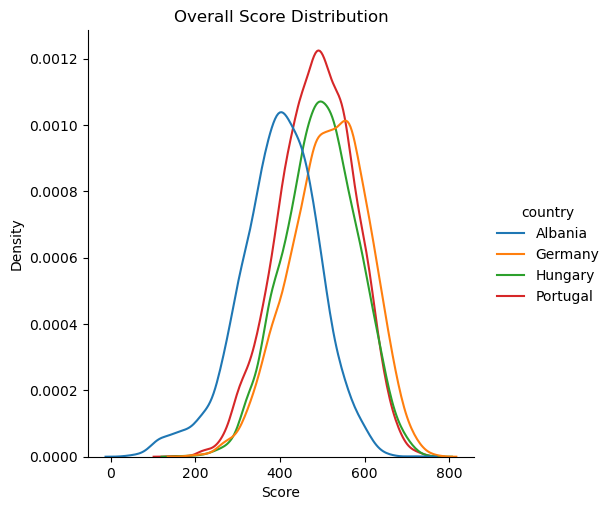

In [31]:
df['overall_score'] = (df.math_score + df.read_score + df.science_score) / 3.0
sns.displot(data=df, x='overall_score', hue='country', kind='kde')
plt.xlabel('Score')
plt.title('Overall Score Distribution');

Albania is the lowest-income country in our example. The visualization shows that the overall scores improve as the country's GPD/capita increases. Portugal and Hungary are more or less in the same income level and their overall scores are almost identical. Germany's overall score is the best on average.

### What is the subject score distribution across males and females?

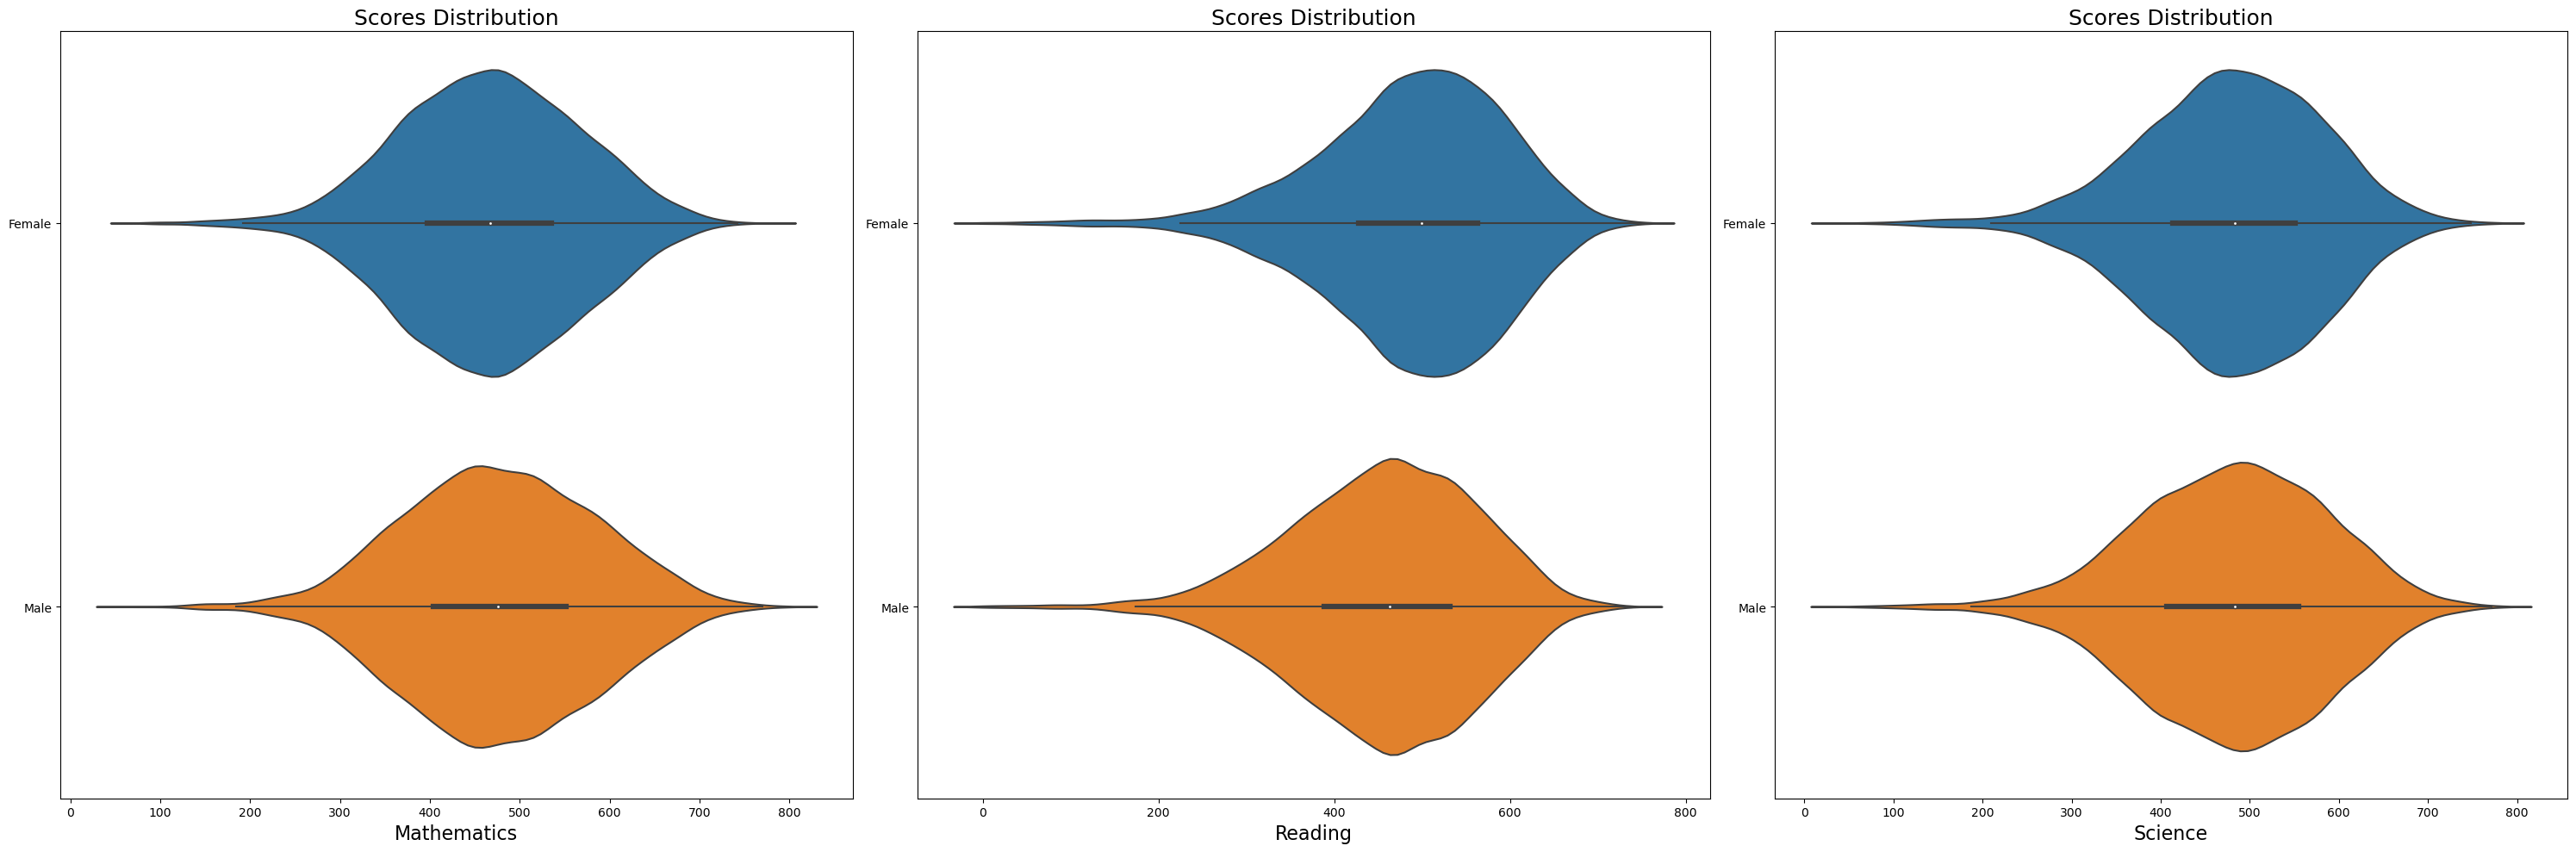

In [68]:
subject_xlabels = ['Mathematics', 'Reading', 'Science']
subject_ylabels = ['', '', '']
title = 'Scores Distribution'
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(30, 10)
sns.violinplot(data=df, x='math_score', y='gender', ax=axes[0])
sns.violinplot(data=df, x='read_score', y='gender', ax=axes[1])
sns.violinplot(data=df, x='science_score', y='gender', ax=axes[2])

clean_subplot_labels(axes, title, subject_xlabels, subject_ylabels)

fig.tight_layout();

Subject scores of males and females are almost identical in mathematics and science. Females' reading scores are somewhat better than males.

### What is the distribution of the scores based on the single-player gaming frequency?

In [33]:
single_gamer_group = df.groupby('outofschool_single_games').mean()
single_gamer_group[['math_score', 'read_score', 'science_score']]

math_score  read_score  science_score
outofschool_single_games                                       
Almost every day          501.596480  490.666338     508.252283
Every day                 478.523440  466.478973     486.625253
Never or hardly ever      498.407571  510.820050     509.772755
Once or twice a month     498.333601  506.393186     508.425872
Once or twice a week      507.330651  505.541740     516.263934

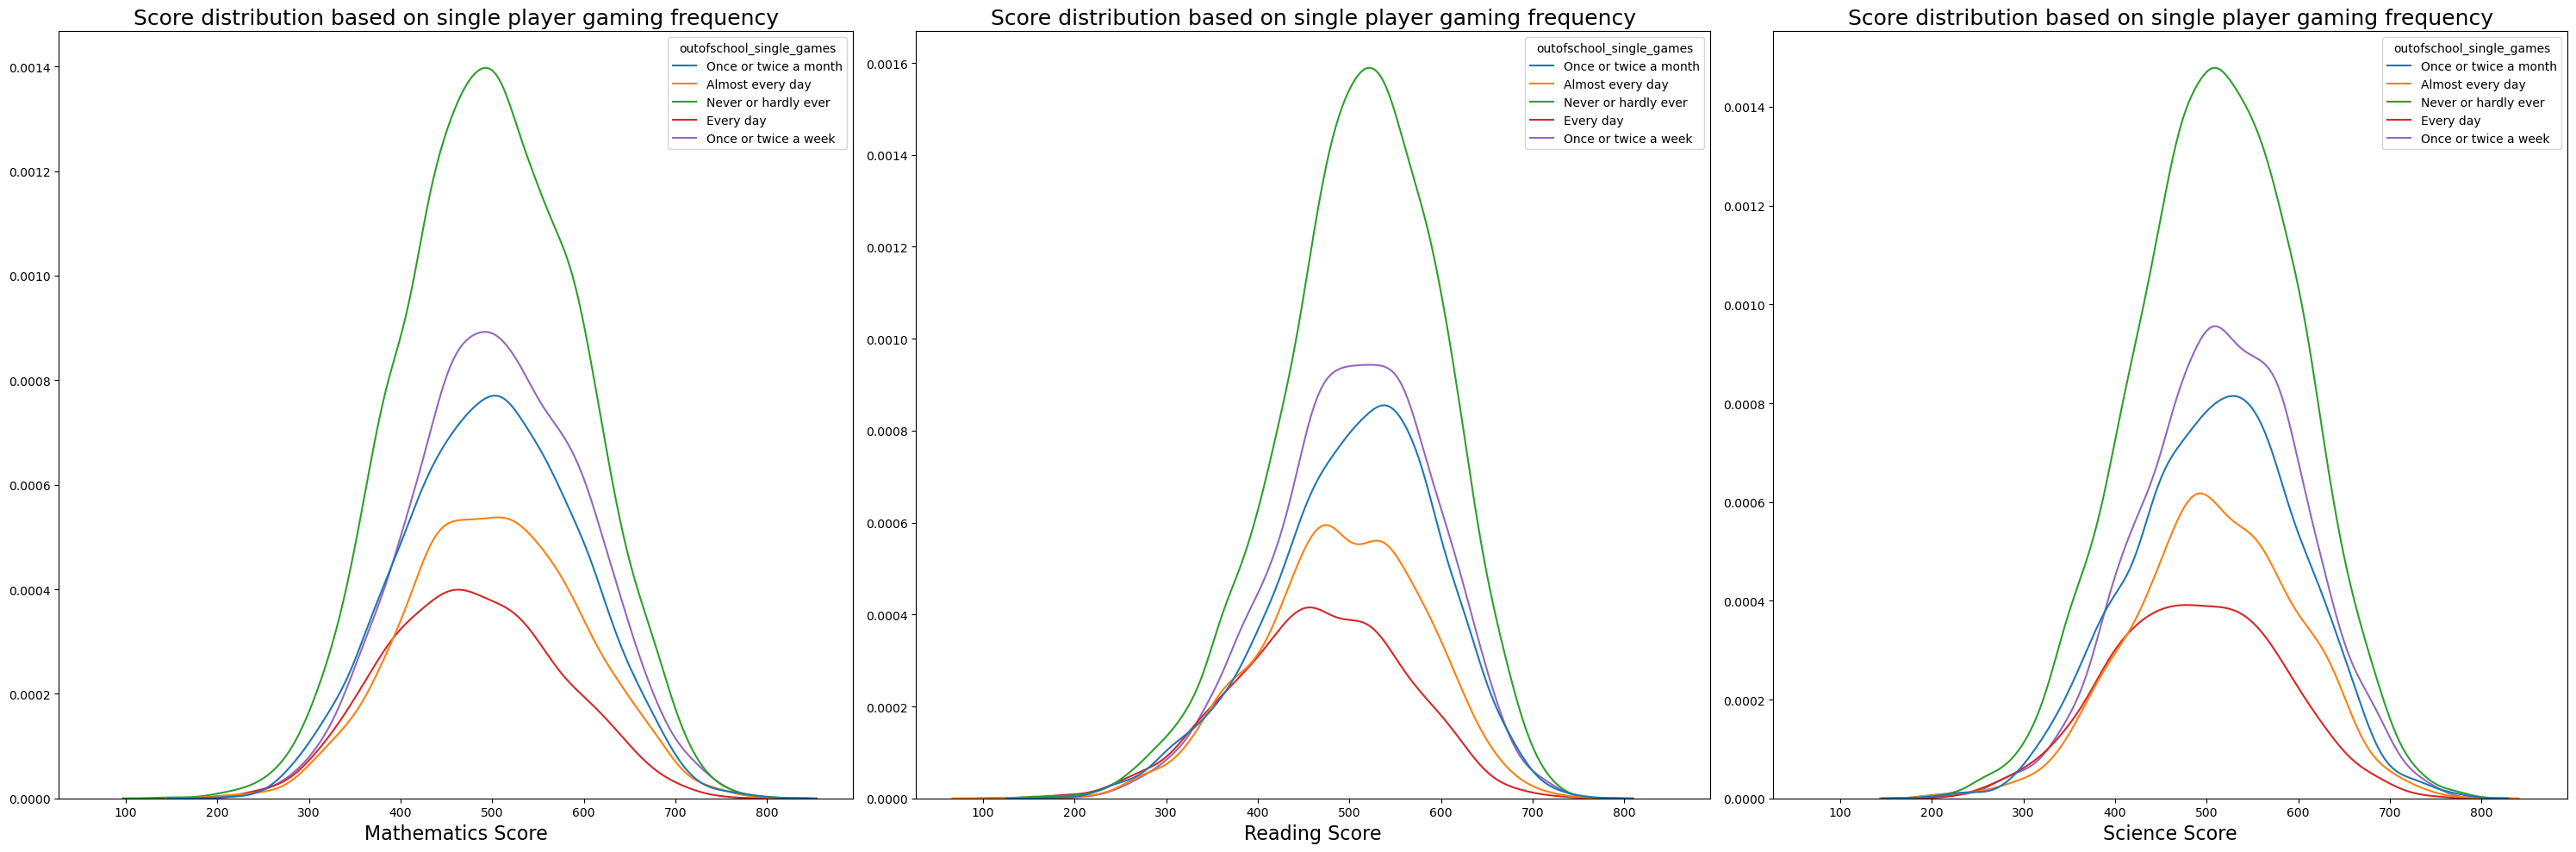

In [69]:
single_game_xlabels = ['Mathematics Score', 'Reading Score', 'Science Score']
single_game_ylabels = ['', '', '']
title = 'Score distribution based on single player gaming frequency'
frequency_order = frequency_category.categories.to_list()

fig, axes = plt.subplots(1, 3, sharex=True)
fig.set_size_inches(30, 10)
sns.kdeplot(data=df, x='math_score', hue='outofschool_single_games', ax=axes[0])
sns.kdeplot(data=df, x='read_score', hue='outofschool_single_games', ax=axes[1])
sns.kdeplot(data=df, x='science_score', hue='outofschool_single_games', ax=axes[2])

clean_subplot_labels(axes, title, single_game_xlabels, single_game_ylabels)

fig.tight_layout();

Every subject's score has normally distributed across the single-player gaming frequency. The majority of students do not play single-player games. All scores slightly decrease, especially in reading, if the students play a single-player game daily. Playing once or twice a month or a week is slightly beneficial for the scores, especially in science subjects.

### What is the distribution of the scores based on the multi-player gaming frequency?

In [35]:
single_gamer_group = df.groupby('outofschool_multi_games').mean()
single_gamer_group[['math_score', 'read_score', 'science_score']]

math_score  read_score  science_score
outofschool_multi_games                                       
Almost every day         510.437791  492.741119     514.867573
Every day                492.009690  476.365272     499.547331
Never or hardly ever     501.030863  515.231387     512.371131
Once or twice a month    489.199009  495.069177     500.529129
Once or twice a week     497.587353  492.148854     505.558768

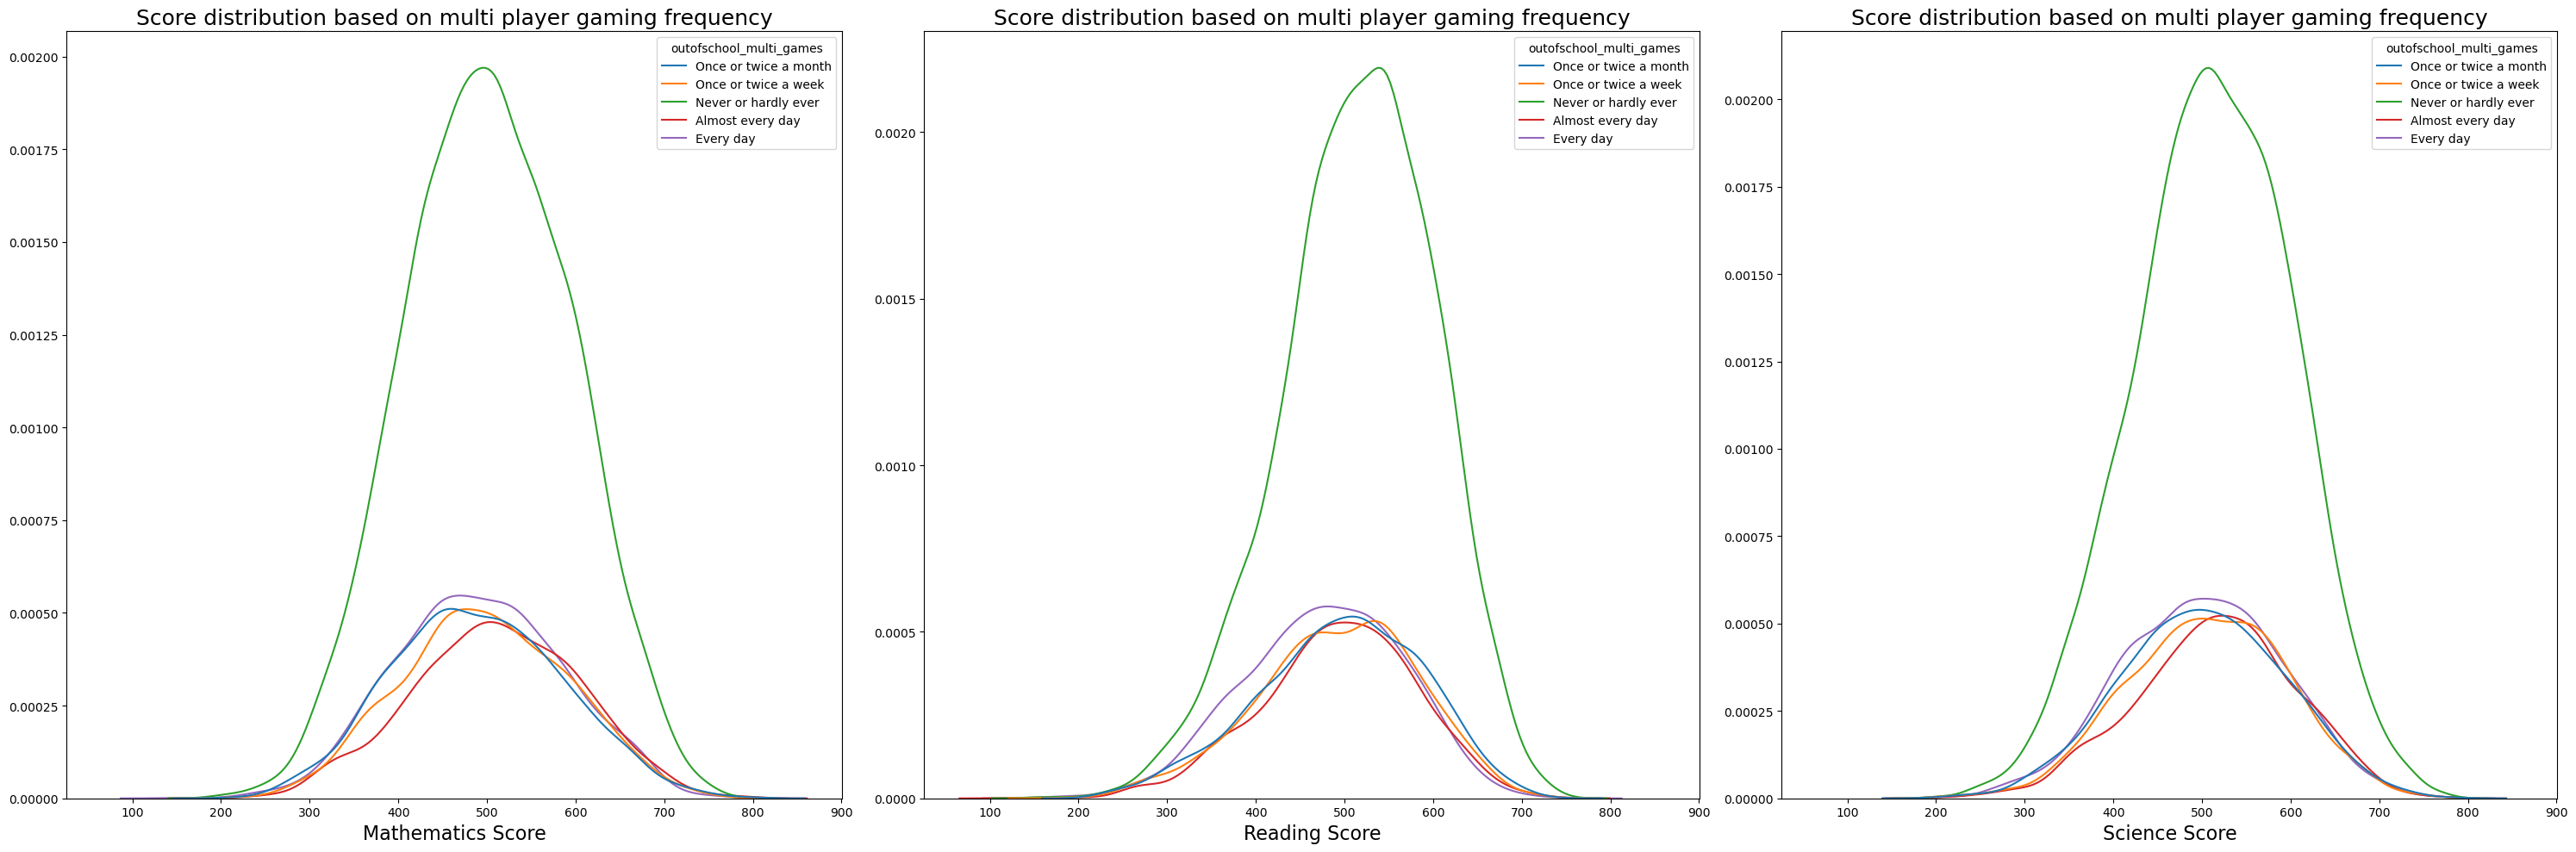

In [70]:
multi_game_xlabels = ['Mathematics Score', 'Reading Score', 'Science Score']
multi_game_ylabels = ['', '', '']
title = 'Score distribution based on multi player gaming frequency'
frequency_order = frequency_category.categories.to_list()

fig, axes = plt.subplots(1, 3, sharex=True)
fig.set_size_inches(30, 10)
sns.kdeplot(data=df, x='math_score', hue='outofschool_multi_games', ax=axes[0])
sns.kdeplot(data=df, x='read_score', hue='outofschool_multi_games', ax=axes[1])
sns.kdeplot(data=df, x='science_score', hue='outofschool_multi_games', ax=axes[2])

clean_subplot_labels(axes, title, multi_game_xlabels, multi_game_ylabels)

fig.tight_layout();

Every subject's score has normally distributed across the multi-player gaming frequency. Most students do not play multiplayer games. All scores slightly decrease, especially in reading, if the students play a multi-player game every day. However, playing multi-player games almost every day results in a tiny score increase in mathematics and science.

### How does the number of parents effect the student's score?

In [37]:
parent_number_group = df.groupby('parent_numbers').mean()
parent_number_group[['math_score', 'read_score', 'science_score', 'overall_score']]

math_score  read_score  science_score  overall_score
parent_numbers                                                      
0.0             416.319815  421.513106     420.459510     419.430810
1.0             482.482510  488.010832     491.638041     487.377128
2.0             476.336736  477.801030     483.974053     479.370606

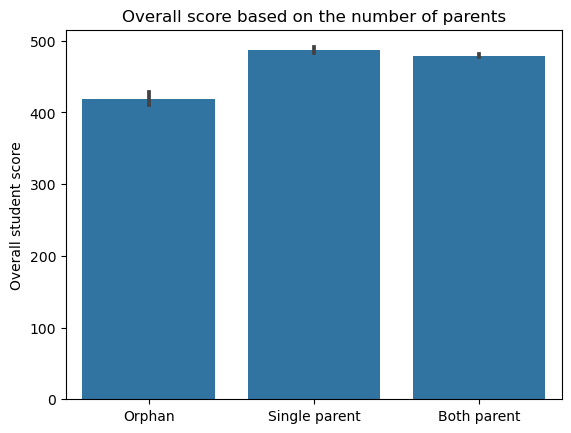

In [38]:
sns.barplot(data=df, x="parent_numbers", y="overall_score", color=sns.color_palette()[0])
plt.xticks(ticks=[0, 1, 2], labels=['Orphan', 'Single parent', 'Both parent'])
plt.xlabel('')
plt.ylabel('Overall student score')
plt.title('Overall score based on the number of parents');

If the student has no parents then the performance of the student is notably decreased. Students have a higher score if they live with single or both parents.

### What is the correlation between the students' scores and the student's environment (school and family)?

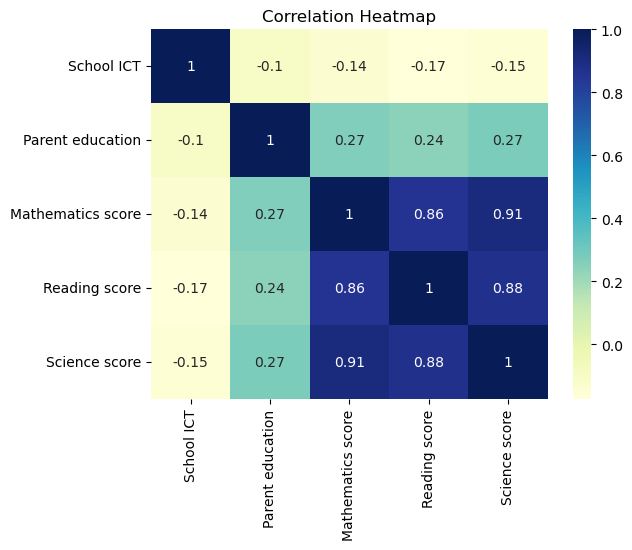

In [39]:
heatmap_labels = ['School ICT', 'Parent education', 'Mathematics score', 'Reading score', 'Science score']
sns.heatmap(df[['school_ict', 'parent_education_years', 'math_score', 'read_score', 'science_score']].corr(),
    xticklabels=heatmap_labels, yticklabels=heatmap_labels, cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap');

There is a strong correlation between the scores across the subject. Parent education is positively correlated with the student's scores. School information communication technology does not correlate with students' scores.

### Do native students have better scores than non-native students?

In [40]:
immigrant_group = df.groupby('immigrant').mean()
immigrant_group[['math_score', 'read_score', 'science_score', 'overall_score']]

math_score  read_score  science_score  overall_score
immigrant                                                              
First-Generation   459.424941  454.618728     462.374452     458.806041
Native             473.014528  475.600127     481.375002     476.663219
Second-Generation  470.676755  477.707630     474.157952     474.180779

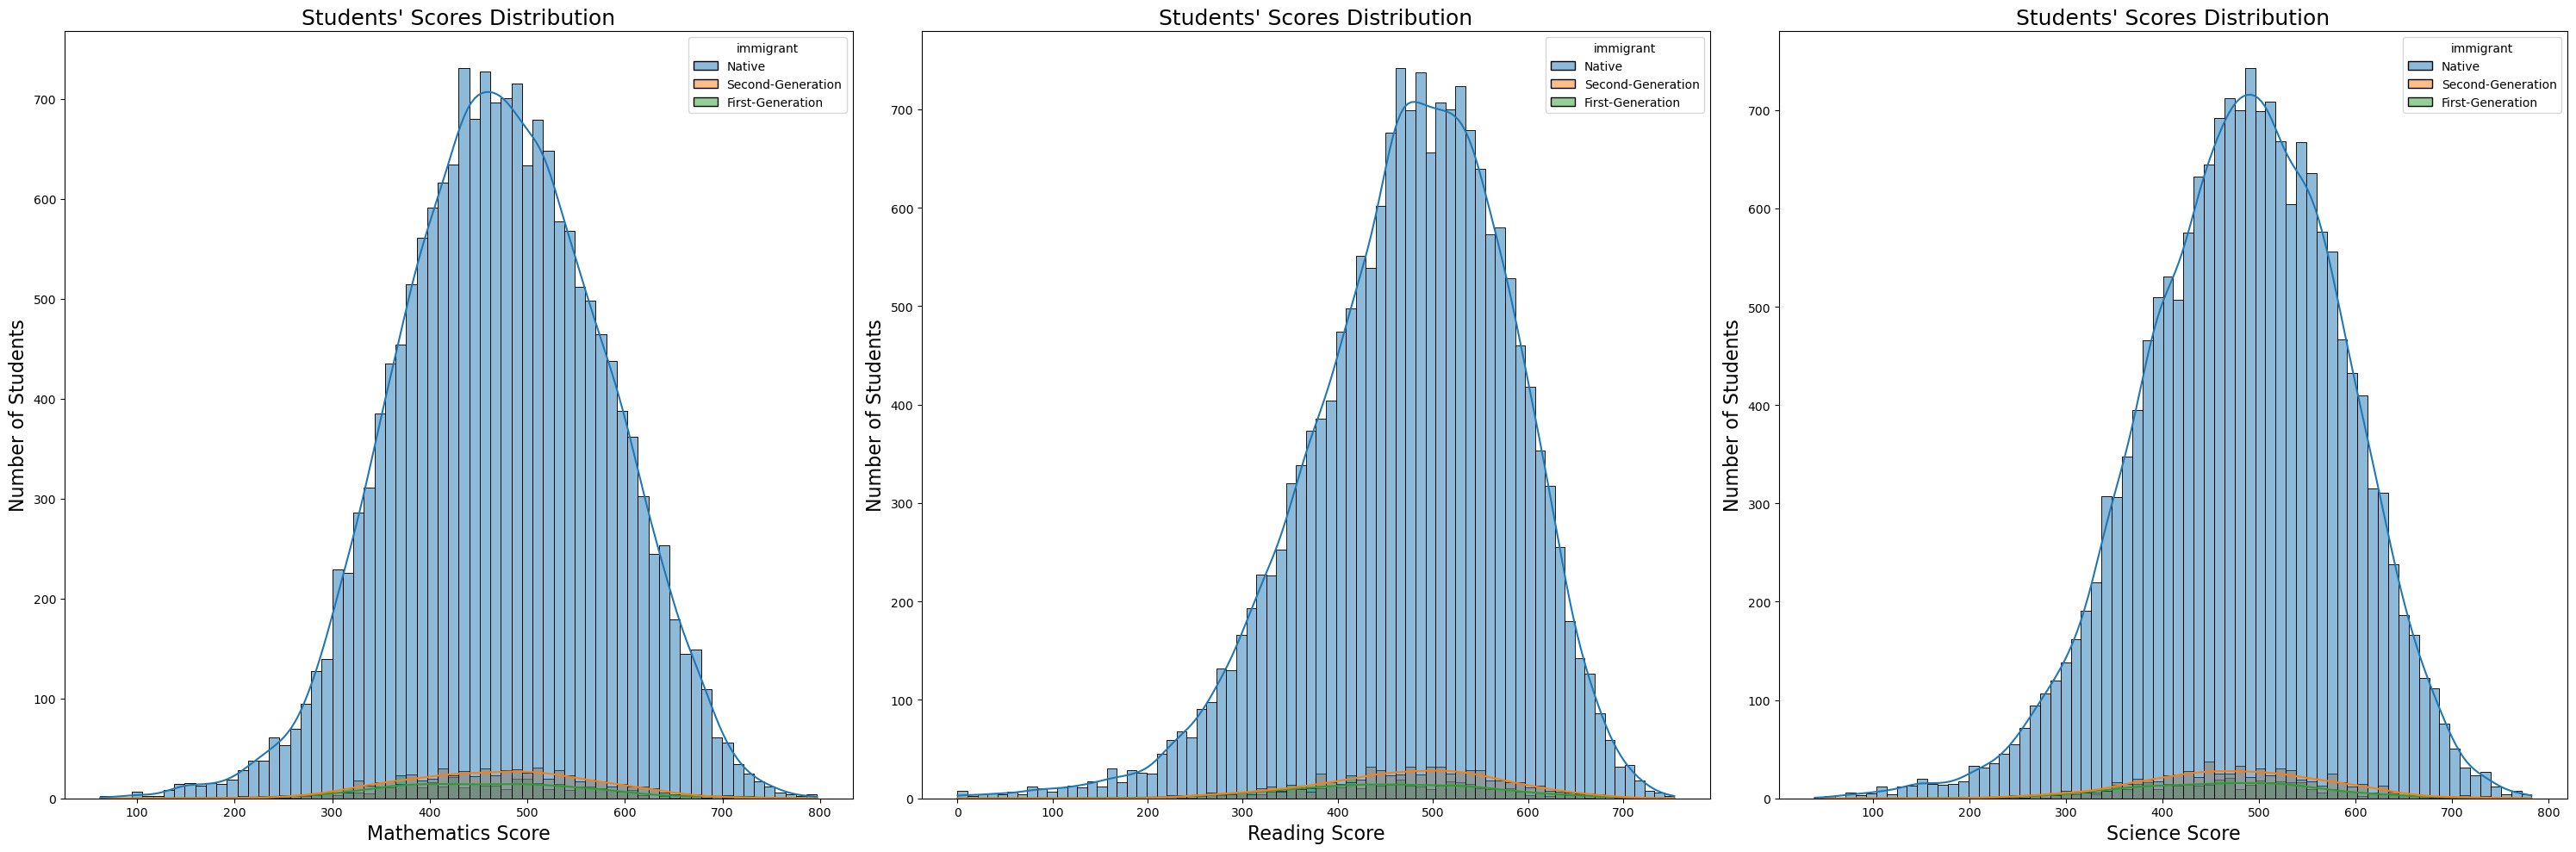

In [92]:
immigrant_xlabels = ['Mathematics Score', 'Reading Score', 'Science Score']
immigrant_ylabels = ['Number of Students', 'Number of Students', 'Number of Students']
title = 'Students\' Scores Distribution'

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(30, 10)
sns.histplot(data=df, x="math_score", hue='immigrant', kde=True, ax=axes[0])
sns.histplot(data=df, x="read_score", hue='immigrant', kde=True, ax=axes[1])
sns.histplot(data=df, x="science_score", hue='immigrant', kde=True, ax=axes[2])

clean_subplot_labels(axes, title, immigrant_xlabels, immigrant_ylabels)

fig.tight_layout();

There are much more native students than non-native ones. All students' scores are normally distributed. Native students do not perform better than their non-native counter part. According to the statistics the first generation immigrant scores slightly less than the native or the second-generation immigrants. 

> Note: I decided to aggregate all the subject score into the `overall_score` column. Hence scores can be visualized by using one graph.

## Multivariate Exploration

### What are the relationship between scores, learning hours, and parent occupation?

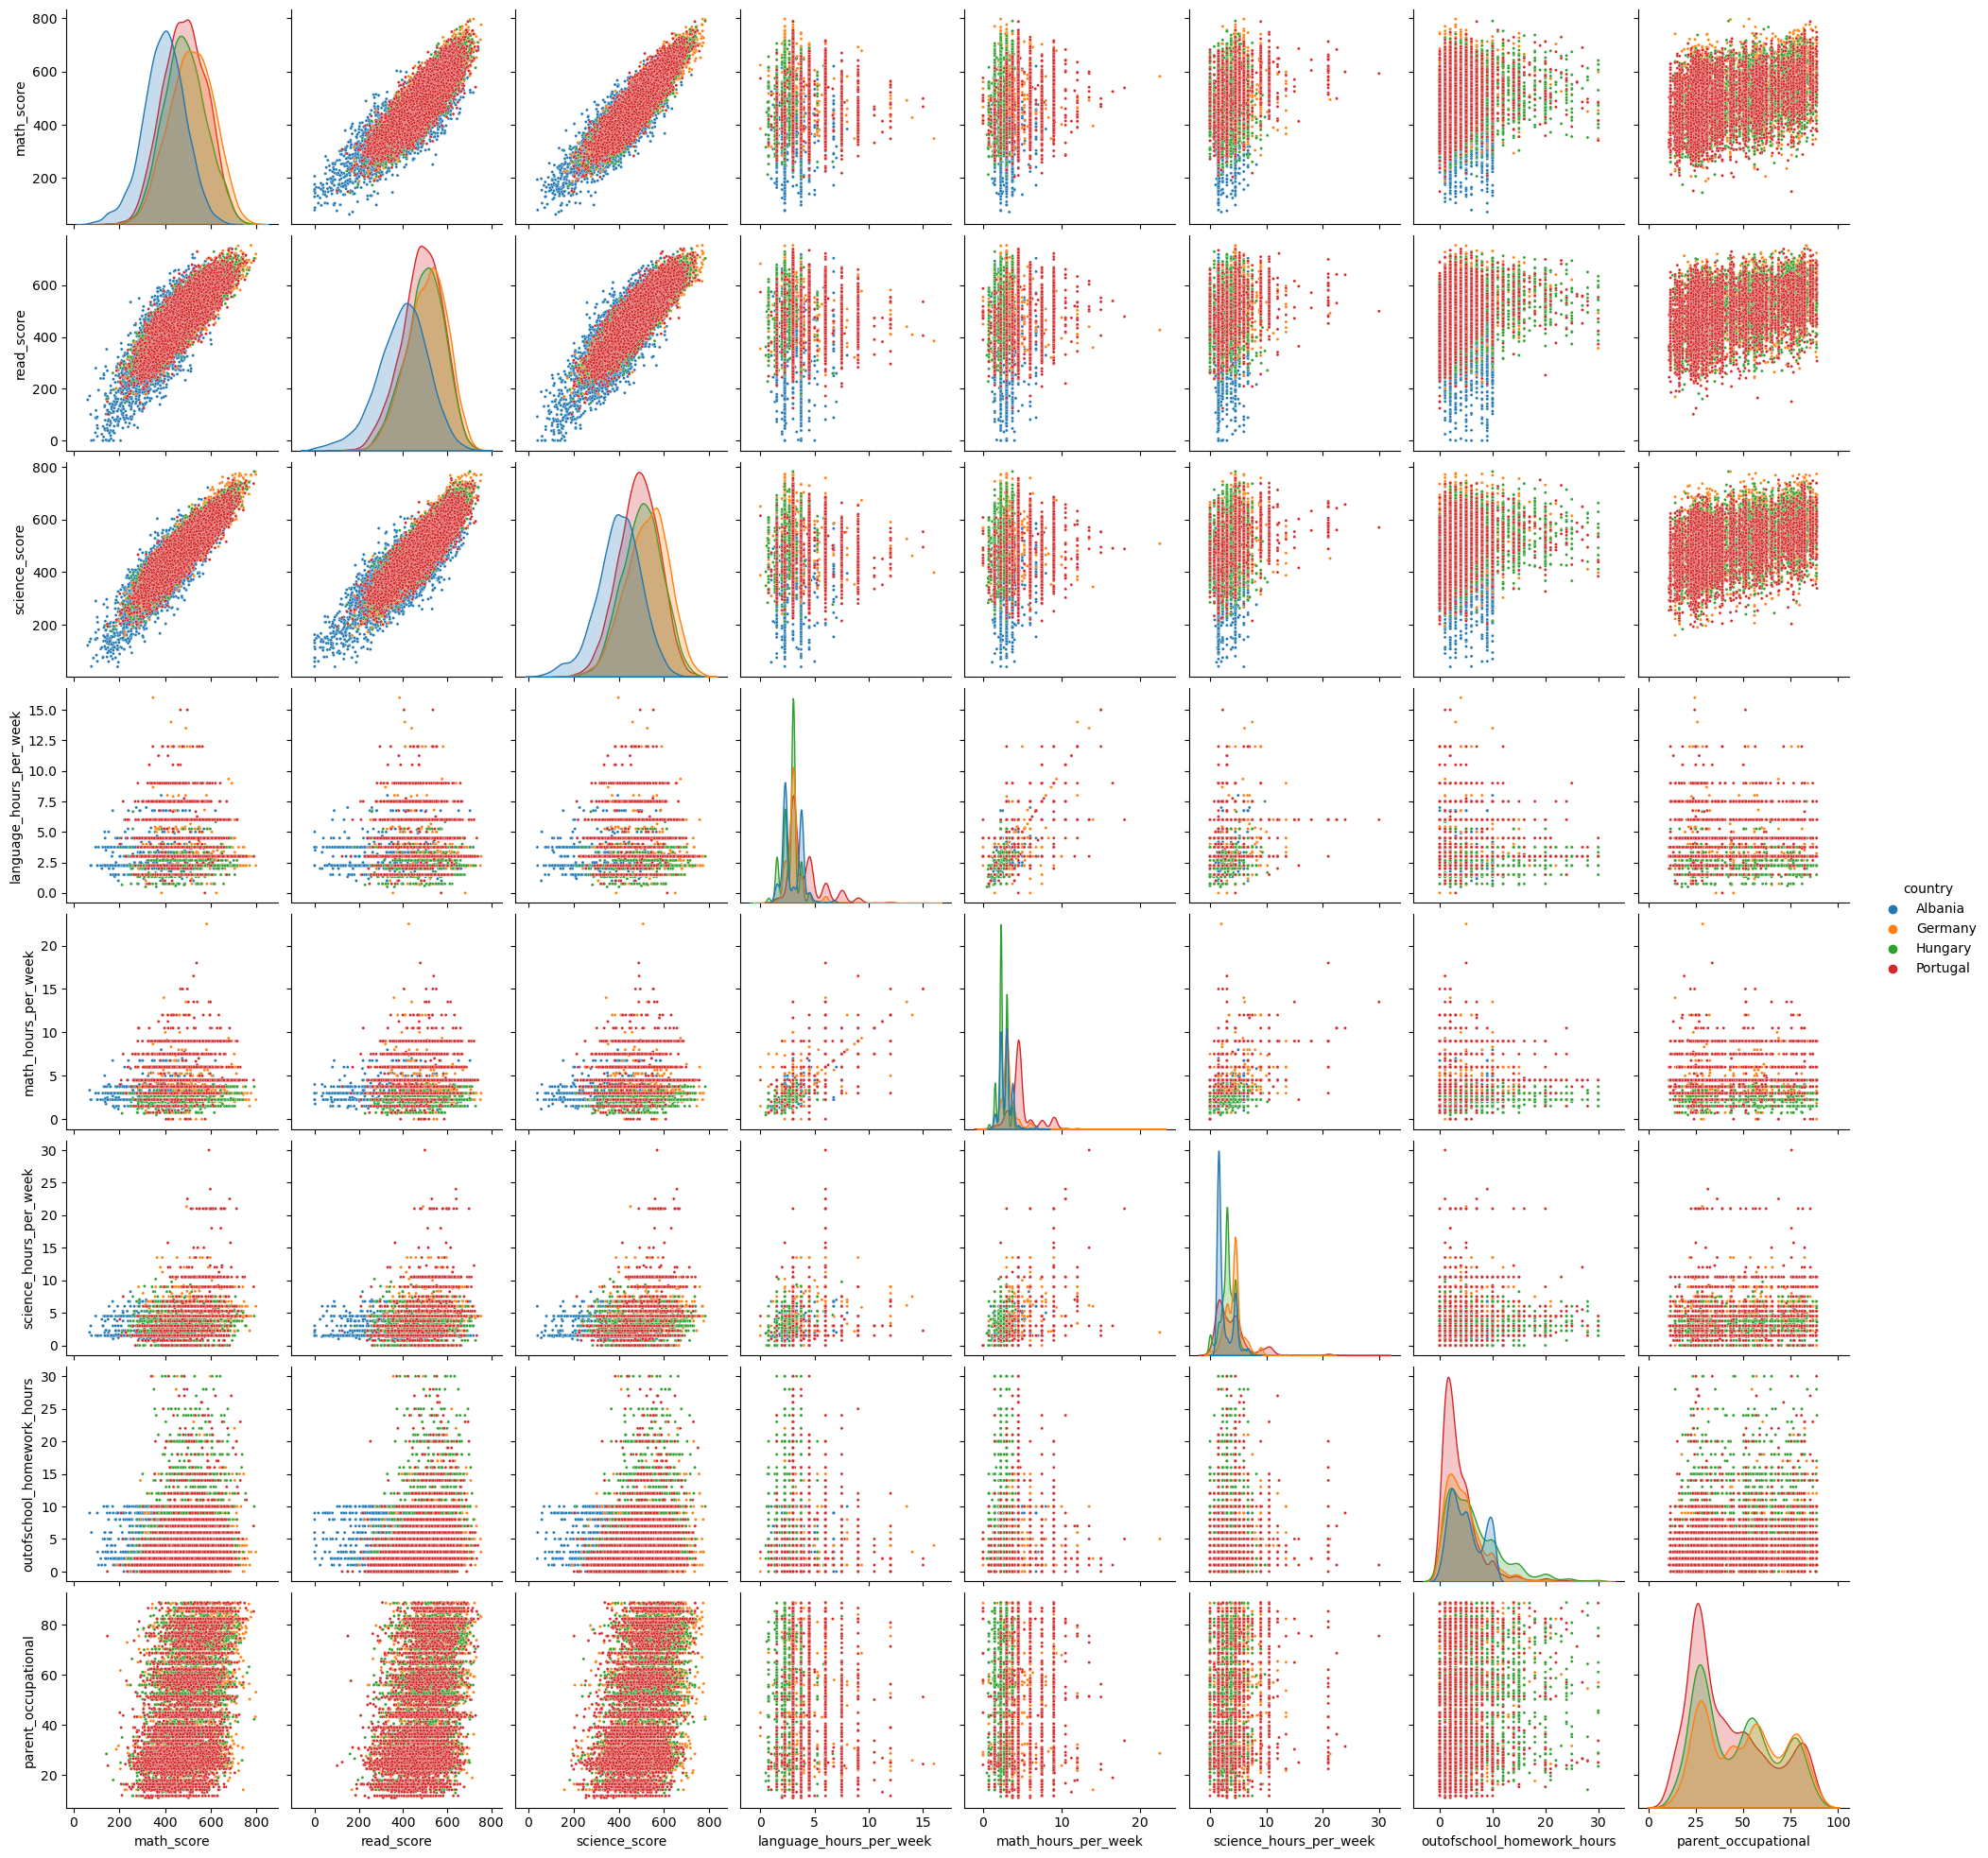

In [42]:
sns.pairplot(data=df, hue="country", plot_kws={"s": 5},
    x_vars=['math_score', 'read_score', 'science_score', 'language_hours_per_week', 'math_hours_per_week', 'science_hours_per_week', 'outofschool_homework_hours', 'parent_occupational'],
    y_vars=['math_score', 'read_score', 'science_score', 'language_hours_per_week', 'math_hours_per_week', 'science_hours_per_week', 'outofschool_homework_hours', 'parent_occupational']);

There is a strong positive correlation between language, math, and science scores. If a student is good at one or two subjects, the other subject's score will also be higher. Parent occupation level moderately correlates with the scores. Students learning more hours per week tend to achieve a slightly higher score. There is a diminishing returns: learning way more hours than baseline will result in less and less score increment. Parent occupation and learning hours per week are not correlated. Albania does the most out-of-school homework according to the distribution, however, they still perform worst in all the subjects.

### How is the student's score affected by the father's educational background? Is there any difference between males and females?

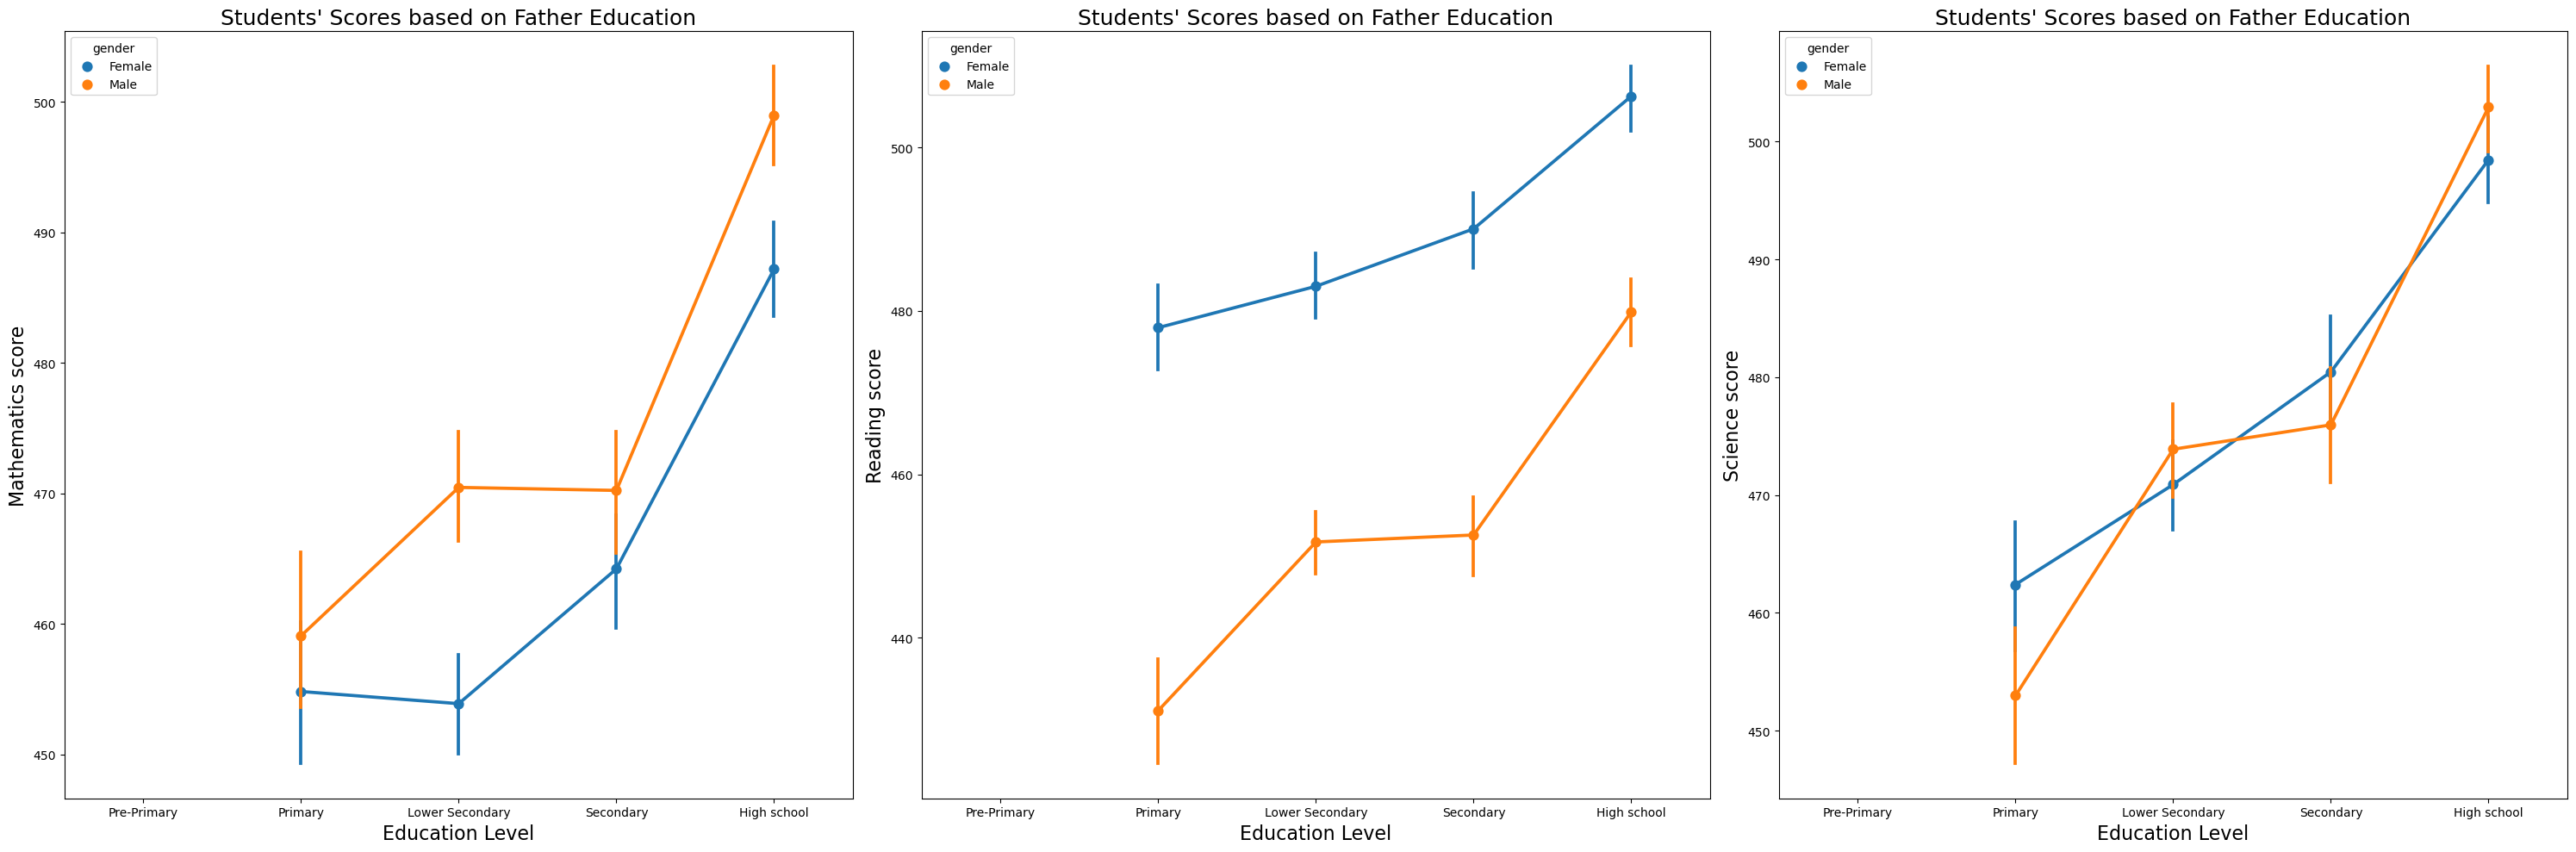

In [76]:
father_schooling_xlabels = ['Education Level', 'Education Level', 'Education Level']
father_schooling_ylabels = ['Mathematics score', 'Reading score', 'Science score']
title = 'Students\' Scores based on Father Education'

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(30, 10)
sns.pointplot(data=df, x="father_schooling", y="math_score", hue="gender", order=renamed_schooling, ax=axes[0])
sns.pointplot(data=df, x="father_schooling", y="read_score", hue="gender", order=renamed_schooling, ax=axes[1])
sns.pointplot(data=df, x="father_schooling", y="science_score", hue="gender", order=renamed_schooling, ax=axes[2])

clean_subplot_labels(axes, title, father_schooling_xlabels, father_schooling_ylabels)

fig.tight_layout();

If the father's education is lower then the students' scores will decrease. The male reading score decreased significantly than female reading scores if their father has only primary education. Mathematics scores increased notably from fathers' secondary education to high school education. Generally the higher the father's educational background, the higher the student's score.

### How is the student's score affected by the mother's educational background? Is there any difference between males and females?

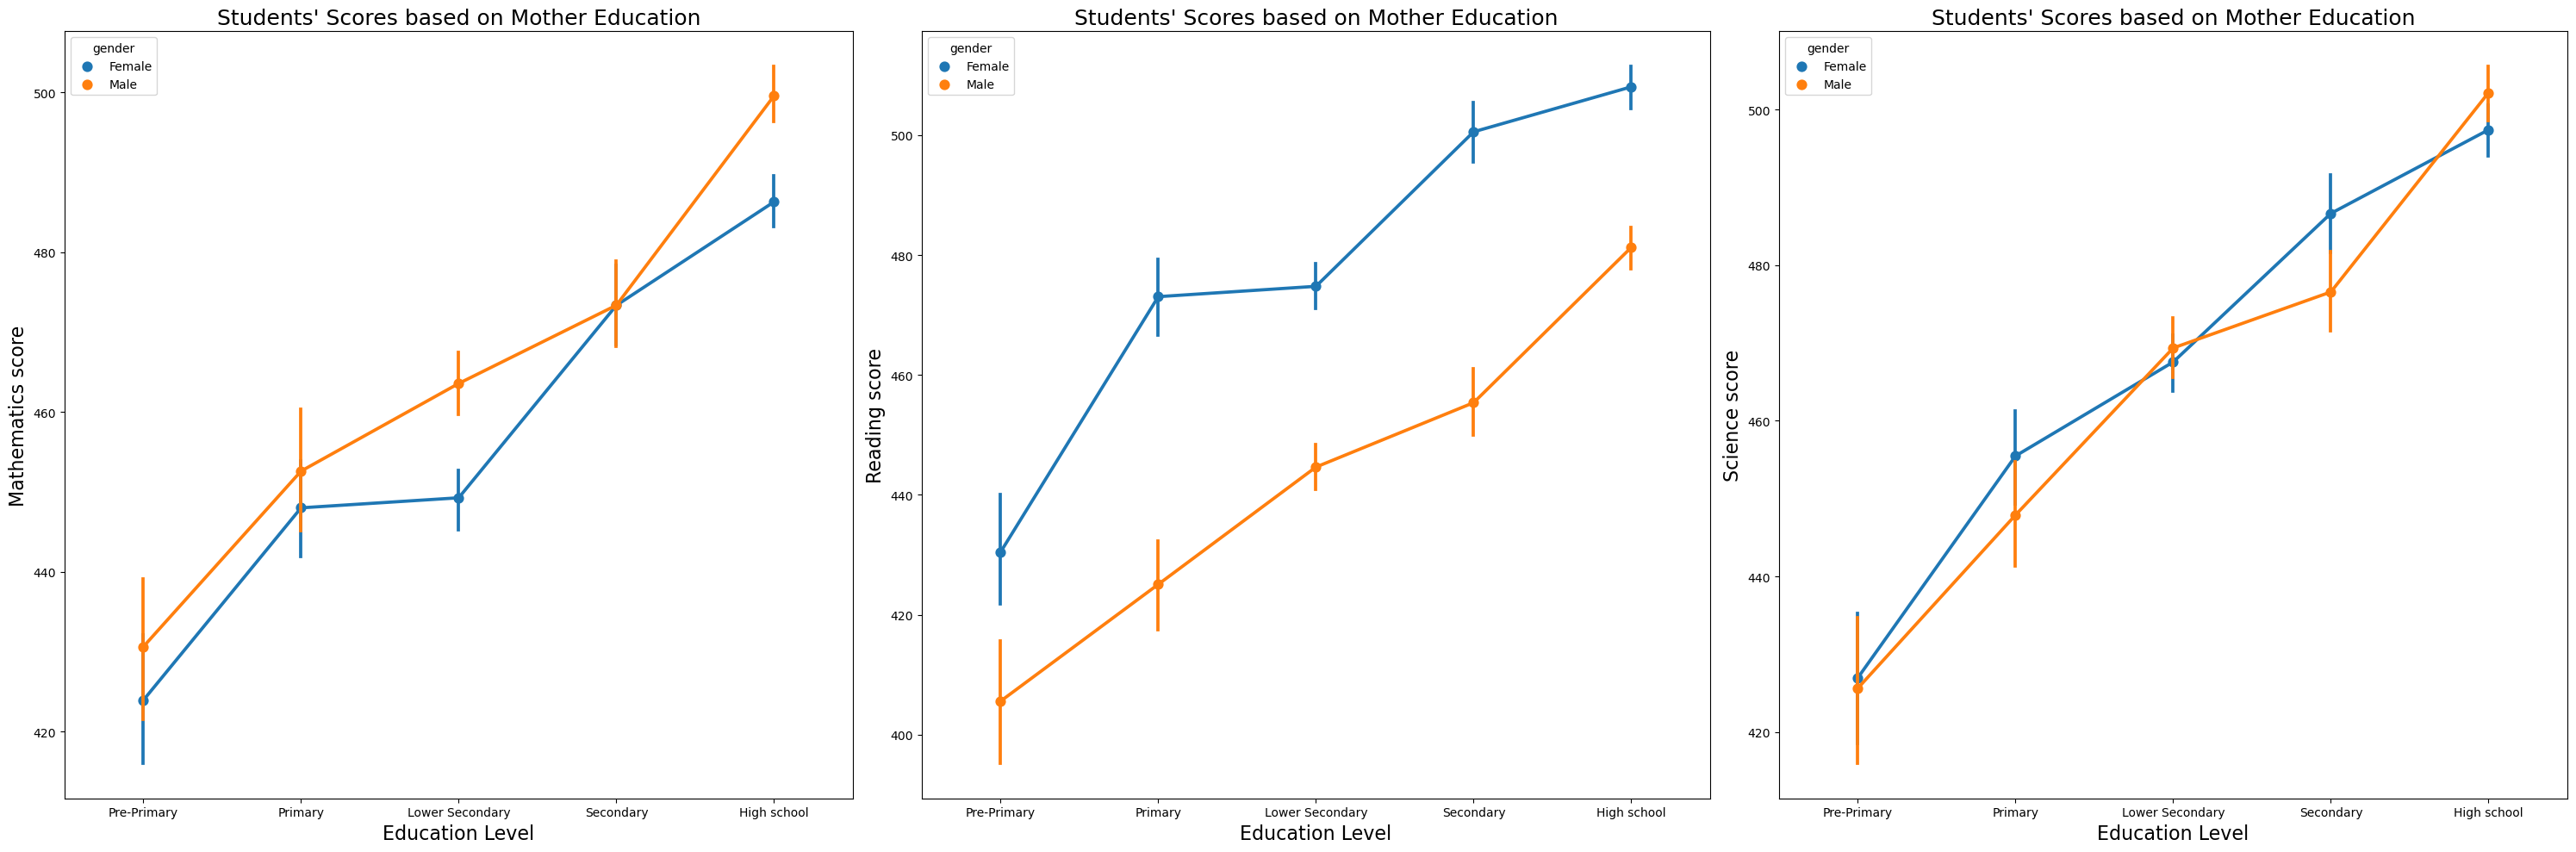

In [77]:
mother_schooling_xlabels = ['Education Level', 'Education Level', 'Education Level']
mother_schooling_ylabels = ['Mathematics score', 'Reading score', 'Science score']
title = 'Students\' Scores based on Mother Education'

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(30, 10)
sns.pointplot(data=df, x="mother_schooling", y="math_score", hue="gender", order=renamed_schooling, ax=axes[0])
sns.pointplot(data=df, x="mother_schooling", y="read_score", hue="gender", order=renamed_schooling, ax=axes[1])
sns.pointplot(data=df, x="mother_schooling", y="science_score", hue="gender", order=renamed_schooling, ax=axes[2])

clean_subplot_labels(axes, title, mother_schooling_xlabels, mother_schooling_ylabels)

fig.tight_layout();

We can also see the math score is reasonably increased from the mother's secondary to high school education. Both graphs tell us that females are better at reading and males are slightly better at mathematics. Both females and males are equally good at science. Generally, the lower the mother's educational background, the student's scores will be lower as well.

### How single player gaming frequency effect the subject scores? Is there any difference between males and females?

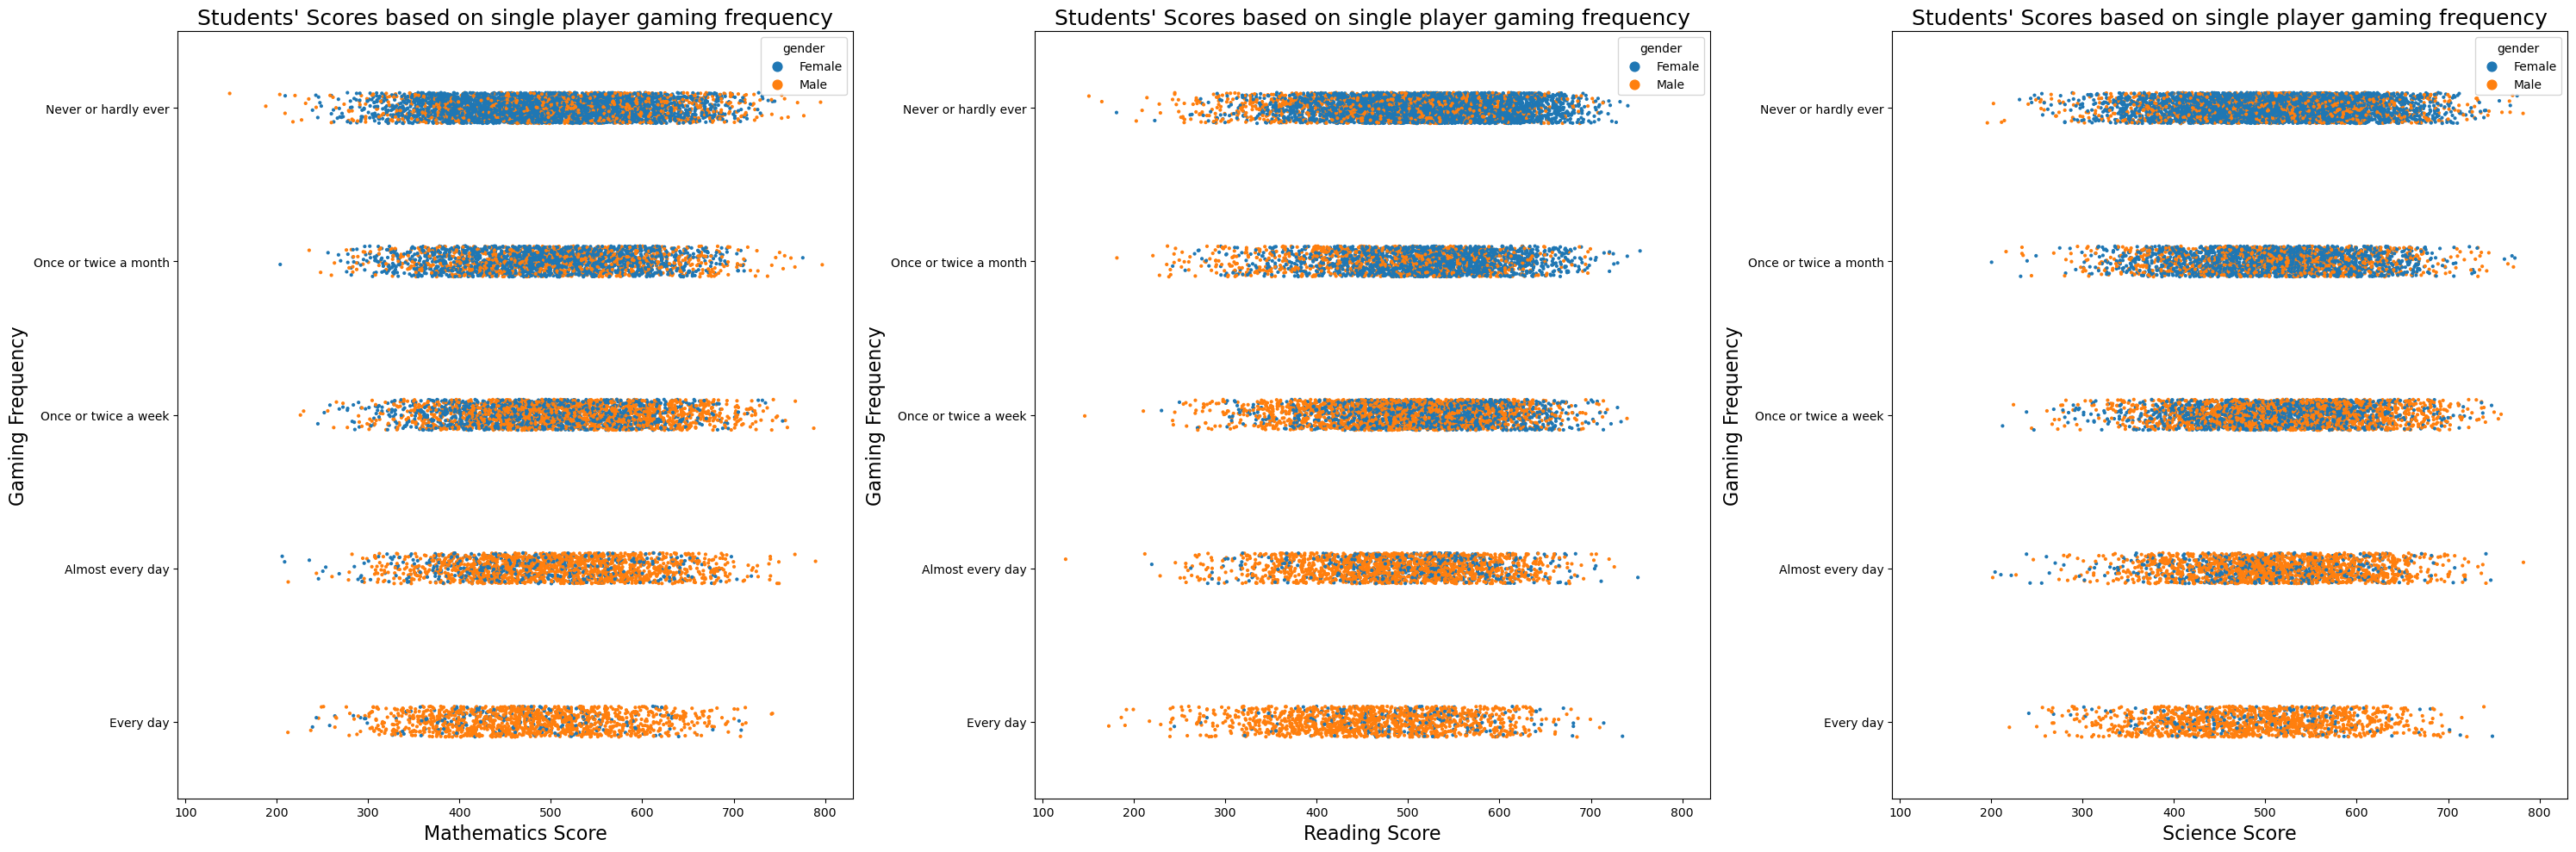

In [87]:
single_game_xlabels = ['Mathematics Score', 'Reading Score', 'Science Score']
single_game_ylabels = ['Gaming Frequency', 'Gaming Frequency', 'Gaming Frequency']
title = 'Students\' Scores based on single player gaming frequency'
frequency_order = frequency_category.categories.to_list()

fig, axes = plt.subplots(1, 3, sharex=True)
fig.set_size_inches(30, 10)
sns.stripplot(data=df, x="math_score", y="outofschool_single_games", hue="gender", order=frequency_order, jitter=True, size=3, ax=axes[0])
sns.stripplot(data=df, x="read_score", y="outofschool_single_games", hue="gender", order=frequency_order, jitter=True, size=3, ax=axes[1])
sns.stripplot(data=df, x="science_score", y="outofschool_single_games", hue="gender", order=frequency_order, jitter=True, size=3, ax=axes[2])

clean_subplot_labels(axes, title, single_game_xlabels, single_game_ylabels)

fig.tight_layout();

Most females never or rarely play single-player games. We can see that playing every day decreases the average score by a small amount. Playing sometimes does not have a huge impact on the scores.

### How single player gaming frequency effect the subject scores? Is there any difference between males and females?

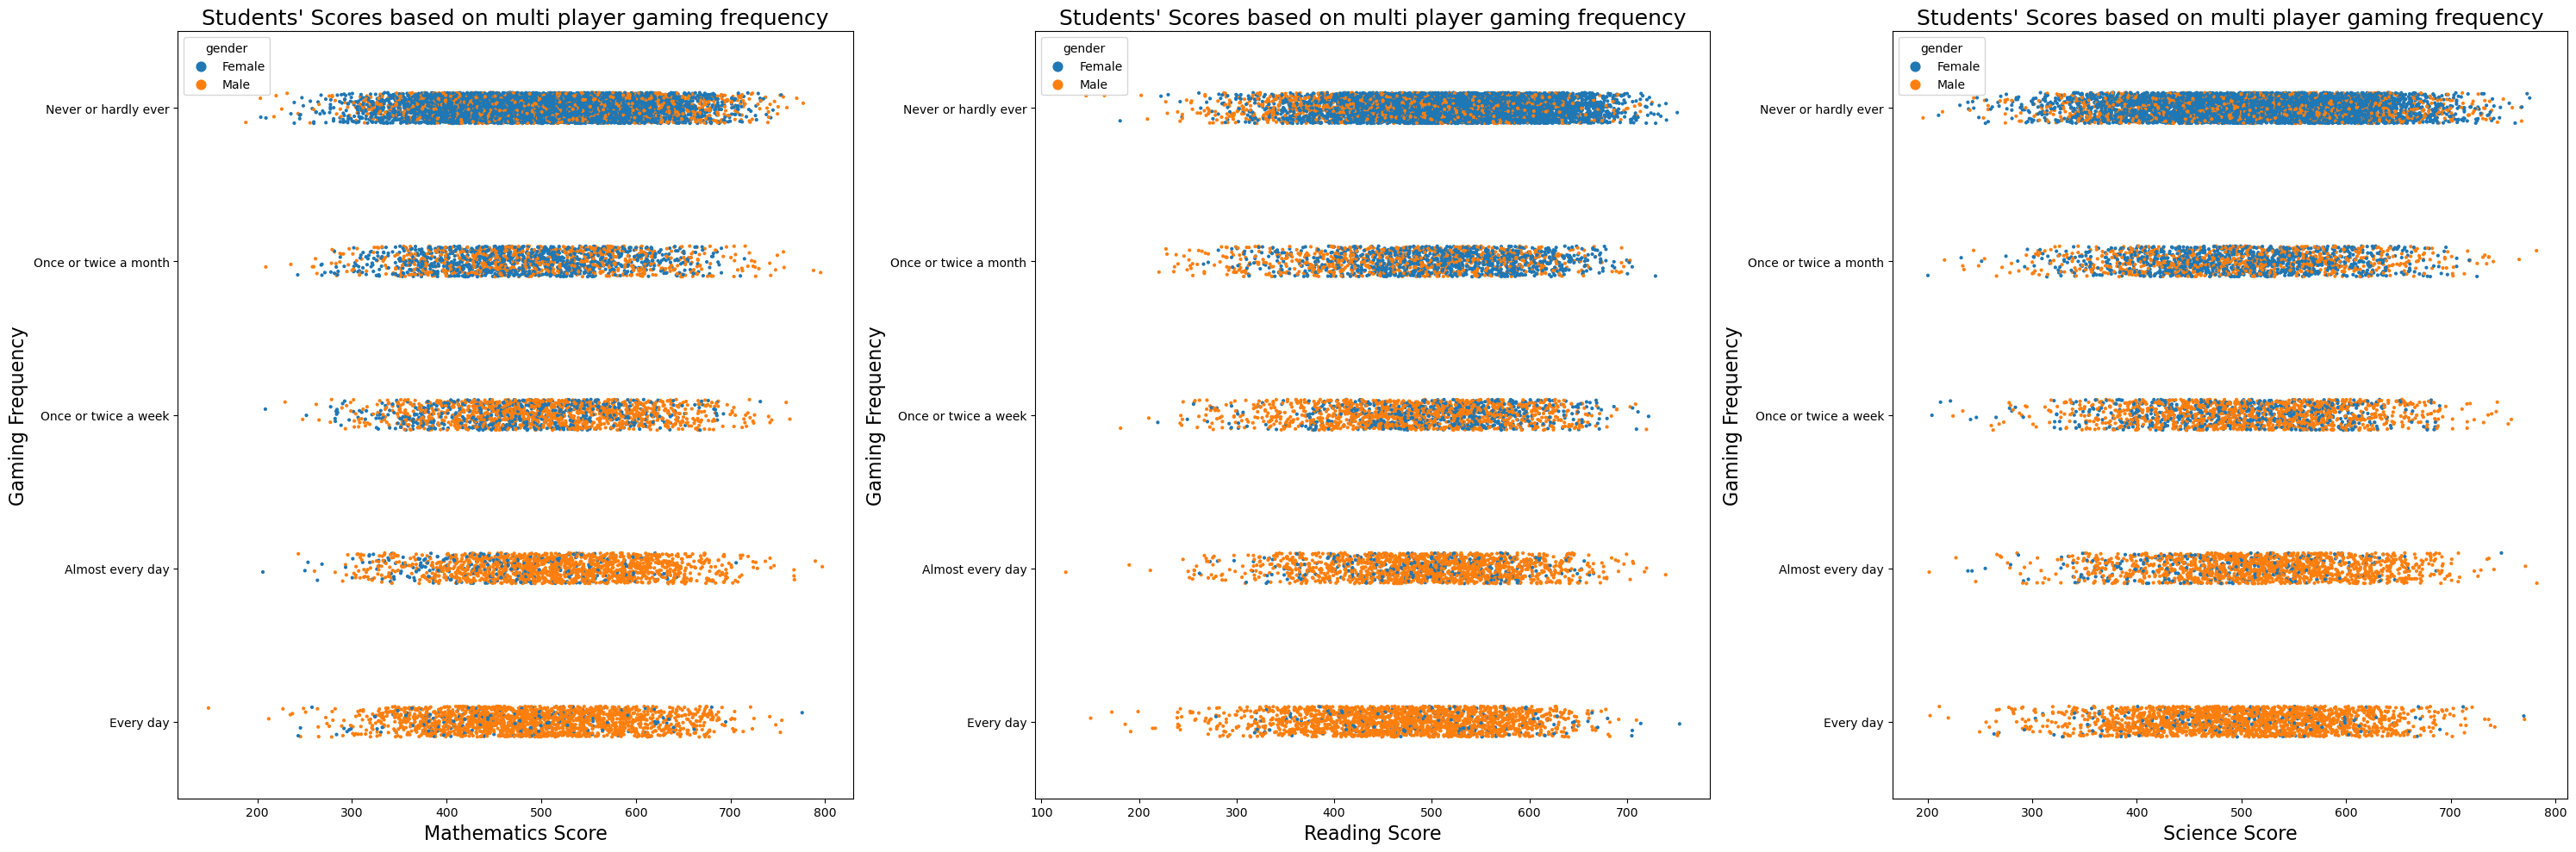

In [91]:
multi_game_xlabels = ['Mathematics Score', 'Reading Score', 'Science Score']
multi_game_ylabels = ['Gaming Frequency', 'Gaming Frequency', 'Gaming Frequency']
title = 'Students\' Scores based on multi player gaming frequency'
frequency_order = frequency_category.categories.to_list()

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
fig.set_size_inches(30, 10)
sns.stripplot(data=df, x="math_score", y="outofschool_multi_games", hue="gender", order=frequency_order, jitter=True, size=3, ax=axes[0])
sns.stripplot(data=df, x="read_score", y="outofschool_multi_games", hue="gender", order=frequency_order, jitter=True, size=3, ax=axes[1])
sns.stripplot(data=df, x="science_score", y="outofschool_multi_games", hue="gender", order=frequency_order, jitter=True, size=3, ax=axes[2])

clean_subplot_labels(axes, title, multi_game_xlabels, multi_game_ylabels)

fig.tight_layout();

Most females never or rarely play multi-player games. We can see that playing every day decreases the average score by a small amount. Playing sometimes does not have a huge impact on the scores. More females play single-player than multi-player games. 

## Conclusions

* Albania (lower income country) performs worst among Portugal, Hungary (middle-income countries), and Germany (higher income country).
* More than half of the school does not have group work.
* Students spend more time on a computer than doing homework on average.
* Genders are similarly good at math and science. Females are better at reading than males.
* First-generation immigrant scores slightly less than others.
* Students have a higher score if they live with single or both parents.
* Parent educational background positively correlated with the student's score. Higher parent education translates to higher students score.
* Playing video games daily will reduce the students' scores. Males play more than females, especially in the multi-player setup.

## References

UTF8 decode problem: https://stackoverflow.com/questions/30996289/utf8-codec-cant-decode-byte-0xf3, https://stackoverflow.com/questions/36462852/how-to-read-utf-8-files-with-pandas

Country GDP/capita: https://www.quora.com/Is-Hungary-a-developed-or-a-developing-country

Convert string to bool: https://stackoverflow.com/questions/17702272/convert-pandas-series-containing-string-to-boolean

Figure title: https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html

Common xlabel for subplots: https://stackoverflow.com/questions/16150819/common-xlabel-ylabel-for-matplotlib-subplots

Pairplot marker size: https://stackoverflow.com/questions/42181317/changing-the-size-of-seaborn-pairplot-markers